# Project Overview
The City of Chicago Vehicle Safety Board (CCVSB) interested in reducing traffic accidents and becoming aware of any interesting patterns.

# Business Problem

The business problem is to build a classifier that can predict the primary contributory cause of car accidents in Chicago city.

# Defineing the Questions
   1. *Are there any specific locations or road segments in Chicago city that have a higher frequency of car accidents?*

   2. *What are the contributing factors or characteristics associated with severe car accidents in Chicago city?*

   3. *Are there any seasonal or temporal patterns in car accidents in Chicago city?*

Additionally, I will create a classification model to categorize accidents into two main groups for future reference:

1. Accidents caused by unintentional factors: *These accidents occur when drivers are not purposely or knowingly involved in causing the accident. They may result from factors such as driver error, environmental conditions, mechanical failures, or other unforeseen circumstances.*

2. Accidents caused by intentional factors: *These accidents involve drivers who are deliberately or knowingly involved in causing the accident. They may engage in reckless driving, aggressive behavior, or intentionally violate traffic laws, leading to the occurrence of the accident.*

By developing this classification model, we aim to distinguish between accidents that result from unintentional factors and those that involve intentional actions. This categorization will enable us to analyze and understand the different contributing factors and characteristics associated with each category, leading to targeted strategies for accident prevention and improving overall road safety.

# Data

The dataset was from Chicago city. Their were three datasets that was obtain from Chicago Data Portal:


    * Traffic_Crashes_-_People 
    * Traffic_Crashes_-_Vehicles
    * Traffic_Crashes_-_Crashes
The data provides up-to-date information as per now May 2023 from 2015.The two datasets was cleaned and merged to one.

# Data Grocery

| Index | Column Name             | Description                                                  |
|-------|-------------------------|--------------------------------------------------------------|
| 1     | SEX                     | Gender of the person involved in the accident                |
| 2     | AGE                     | Age of the person involved in the accident                   |
| 3     | DRIVER_ACTION           | Action taken by the driver before the accident               |
| 4     | DRIVER_VISION           | Vision condition of the driver during the accident           |
| 5     | PHYSICAL_CONDITION      | Physical condition of the driver at the time of the accident |
| 6     | MANEUVER                | Maneuver performed by the driver during the accident         |
| 7     | POSTED_SPEED_LIMIT      | Speed limit posted on the road where the accident occurred   |
| 8     | TRAFFIC_CONTROL_DEVICE  | Traffic control device present at the accident location      |
| 9     | DEVICE_CONDITION        | Condition of the traffic control device                       |
| 10    | WEATHER_CONDITION       | Weather conditions during the accident                        |
| 11    | LIGHTING_CONDITION      | Lighting conditions during the accident                       |
| 12    | TRAFFICWAY_TYPE         | Type of the trafficway where the accident occurred           |
| 13    | ROADWAY_SURFACE_COND    | Surface condition of the roadway at the accident location    |
| 14    | ROAD_DEFECT             | Defects present on the road where the accident occurred       |
| 15    | PRIM_CONTRIBUTORY_CAUSE | Primary contributory cause of the accident                    |
| 16    | CRASH_HOUR              | Hour of the day when the accident occurred                   |
| 17    | CRASH_DAY_OF_WEEK       | Day of the week when the accident occurred                   |
| 18    | CRASH_MONTH             | Month when the accident occurred                             |
| 19    | LATITUDE                | Latitude coordinate of the accident location                  |
| 20    | LONGITUDE               | Longitude coordinate of the accident location                 |
| 21    | LOCATION                | Location description of the accident                          |



# Recording the Experimental Design

To record the experimental design for building the classifier to predict the primary contributory cause of car accidents in Chicago, I used the following steps:

* Data Collection:  I gather crashes, vehicle and people accident data from https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3  and https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d 

* Data Preprocessing: Clean the data by handling missing values, inconsistencies, and outliers.
                      Transform categorical variables into numerical representations suitable for machine learning algorithms.
                      Normalize or standardize numerical features if necessary

* Exploratory Data Analysis (EDA): Perform exploratory analysis to understand the characteristics and distributions of variables.
                                   Identify patterns, correlations, or any interesting insights within the data.
                                   Visualize the data using plots, charts, or graphs to aid in understanding.

* Feature Engineering:Extract relevant features from the available data that may contribute to predicting the primary contributory cause of car accidents.
* Target Variable Binning: Analyze the distribution of the primary contributory cause categories.
Merge or eliminate categories with very few samples to limit the number of target categories.                                  

* Feature Selection: Select the most informative features that are likely to have a significant impact on the prediction.

* Model Selection and Training:Choose a suitable machine learning algorithm for multi-class classification, considering factors like performance, interpretability, and scalability.Split the preprocessed data into training and testing sets.
Train the chosen model on the training data using appropriate algorithms and methodologies.
* Model Evaluation:Evaluate the trained model's performance using relevant evaluation metrics for multi-class classification, such as accuracy, precision, recall, F1-score, or confusion matrix.Perform cross-validation techniques like k-fold cross-validation to assess the model's robustness.
* Model Optimization:Fine-tune the model by optimizing hyperparameters to improve its performance.
Use techniques like grid search, random search.
* Predictions and Interpretation:Use the optimized model to predict the primary contributory cause of car accidents for new instances.
Analyze the predictions and interpret the results to gain insights into patterns, potential causes, or any interesting findings that can aid accident prevention efforts.
* Reporting and Recommendations:Summarize the findings and insights obtained from the classifier.
Provide actionable recommendations for the Vehicle Safety Board or the City of Chicago based on the analysis and predictions.

# Loading the datasets

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# Reading csv file
people=pd.read_csv('C:\\Users\\iantu\\OneDrive\\Desktop\\phase 3 project\\dsc-phase-3-project-v2-3\\.data\\Traffic_Crashes_-_People.csv')
vehicles=pd.read_csv('C:\\Users\\iantu\\OneDrive\\Desktop\\phase 3 project\\dsc-phase-3-project-v2-3\\.data\\Traffic_Crashes_-_Vehicles.csv')
crashes=pd.read_csv('C:\\Users\\iantu\\OneDrive\\Desktop\\phase 3 project\\dsc-phase-3-project-v2-3\\.data\\Traffic_Crashes_-_Crashes.csv')

C:\Users\iantu\AppData\Local\Temp\ipykernel_3564\3249920917.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  people=pd.read_csv('C:\\Users\\iantu\\OneDrive\\Desktop\\phase 3 project\\dsc-phase-3-project-v2-3\\.data\\Traffic_Crashes_-_People.csv')
C:\Users\iantu\AppData\Local\Temp\ipykernel_3564\3249920917.py:3: DtypeWarning: Columns (2,19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles=pd.read_csv('C:\\Users\\iantu\\OneDrive\\Desktop\\phase 3 project\\dsc-phase-3-project-v2-3\\.data\\Traffic_Crashes_-_Vehicles.csv')


In [3]:
# A function to print the shape of our datasets
def print_dataset_shape(*datasets):
    """
    Prints the shape of one or more datasets (number of rows and columns).
    Assumes datasets are in a Pandas DataFrame format.
    """
    for idx, dataset in enumerate(datasets):
        print(f"Dataset {idx + 1} - Number of rows: {dataset.shape[0]}")
        print(f"Dataset {idx + 1} - Number of columns: {dataset.shape[1]}")
# print the shape of our dataset
print_dataset_shape(people, vehicles,crashes)

Dataset 1 - Number of rows: 1584616
Dataset 1 - Number of columns: 30
Dataset 2 - Number of rows: 1472816
Dataset 2 - Number of columns: 72
Dataset 3 - Number of rows: 722809
Dataset 3 - Number of columns: 49


In [4]:
# Getting the info of our data
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584616 entries, 0 to 1584615
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1584616 non-null  object 
 1   PERSON_TYPE            1584616 non-null  object 
 2   CRASH_RECORD_ID        1584616 non-null  object 
 3   RD_NO                  1574225 non-null  object 
 4   VEHICLE_ID             1553626 non-null  float64
 5   CRASH_DATE             1584616 non-null  object 
 6   SEAT_NO                320590 non-null   float64
 7   CITY                   1156363 non-null  object 
 8   STATE                  1172272 non-null  object 
 9   ZIPCODE                1057964 non-null  object 
 10  SEX                    1559451 non-null  object 
 11  AGE                    1123239 non-null  float64
 12  DRIVERS_LICENSE_STATE  931218 non-null   object 
 13  DRIVERS_LICENSE_CLASS  785449 non-null   object 
 14  SAFETY_EQUIPMENT  

In [5]:
# Getting the info of our data
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472816 entries, 0 to 1472815
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1472816 non-null  int64  
 1   CRASH_RECORD_ID           1472816 non-null  object 
 2   RD_NO                     1463413 non-null  object 
 3   CRASH_DATE                1472816 non-null  object 
 4   UNIT_NO                   1472816 non-null  int64  
 5   UNIT_TYPE                 1470808 non-null  object 
 6   NUM_PASSENGERS            218014 non-null   float64
 7   VEHICLE_ID                1439674 non-null  float64
 8   CMRC_VEH_I                27533 non-null    object 
 9   MAKE                      1439669 non-null  object 
 10  MODEL                     1439525 non-null  object 
 11  LIC_PLATE_STATE           1308626 non-null  object 
 12  VEHICLE_YEAR              1206500 non-null  float64
 13  VEHICLE_DEFECT            1

In [6]:
# Getting the info of our data
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722809 entries, 0 to 722808
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                722809 non-null  object 
 1   RD_NO                          718253 non-null  object 
 2   CRASH_DATE_EST_I               54664 non-null   object 
 3   CRASH_DATE                     722809 non-null  object 
 4   POSTED_SPEED_LIMIT             722809 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         722809 non-null  object 
 6   DEVICE_CONDITION               722809 non-null  object 
 7   WEATHER_CONDITION              722809 non-null  object 
 8   LIGHTING_CONDITION             722809 non-null  object 
 9   FIRST_CRASH_TYPE               722809 non-null  object 
 10  TRAFFICWAY_TYPE                722809 non-null  object 
 11  LANE_CNT                       199002 non-null  float64
 12  ALIGNMENT                     

In [7]:
# Function to display the head of our datasets
def display_data_head(people,vehicles, crashes):
    dfs = [people.head(), vehicles.head(),crashes.head()]
    df_names = ["people", "vehicles","crashes"]
    for df, name in zip(dfs, df_names):
        print(f"\n{name}:\n")
        display(df)
# Display the head of our datasets
display_data_head(people,vehicles,crashes)


people:



,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O1577624,DRIVER,e8d0a18503a3ef7a69ee631eacffd421ea154ea9782131...,NaN,1500926.0,05/17/2023 10:20:00 AM,NaN,CHICAGO,IL,60637,...,NaN,IMPROPER PARKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O1577610,DRIVER,0690865a402d40a7eab391f94a658b48dc03abb636a03a...,NaN,1500906.0,05/17/2023 10:10:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O1577611,DRIVER,0690865a402d40a7eab391f94a658b48dc03abb636a03a...,NaN,1500913.0,05/17/2023 10:10:00 AM,NaN,VALPARAISO,IN,46385,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O1577604,DRIVER,fe7d5f687f472c631a7a3516d0047a3cf7a8ab2cb0b6a4...,NaN,1500903.0,05/17/2023 10:05:00 AM,NaN,CHICAGO,IL,60613,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O1577605,DRIVER,fe7d5f687f472c631a7a3516d0047a3cf7a8ab2cb0b6a4...,NaN,1500907.0,05/17/2023 10:05:00 AM,NaN,CHICAGO,IL,60660,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN



vehicles:



,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1577434,25d92973475a04a93e7fd206fbfce57e8a9a1e25cc85a7...,NaN,05/16/2023 11:12:00 PM,1,DRIVER,NaN,1500741.0,NaN,HONDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1577435,25d92973475a04a93e7fd206fbfce57e8a9a1e25cc85a7...,NaN,05/16/2023 11:12:00 PM,2,DRIVER,1.0,1500742.0,NaN,CHEVROLET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1577450,375ac7f6fcb4ef73d728edc52ed556f23fd465a351833f...,NaN,05/16/2023 11:06:00 PM,1,DRIVER,NaN,1500759.0,NaN,DODGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1577451,375ac7f6fcb4ef73d728edc52ed556f23fd465a351833f...,NaN,05/16/2023 11:06:00 PM,2,DRIVER,NaN,1500760.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1577452,375ac7f6fcb4ef73d728edc52ed556f23fd465a351833f...,NaN,05/16/2023 11:06:00 PM,3,DRIVER,NaN,1500761.0,NaN,FORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



crashes:



,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,25d92973475a04a93e7fd206fbfce57e8a9a1e25cc85a7...,NaN,NaN,05/16/2023 11:12:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,...,0.0,0.0,3.0,0.0,23,3,5,41.952691,-87.807413,POINT (-87.807413247555 41.952691362649)
1,375ac7f6fcb4ef73d728edc52ed556f23fd465a351833f...,NaN,NaN,05/16/2023 11:06:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR TO FRONT,...,0.0,0.0,3.0,0.0,23,3,5,41.997837,-87.688814,POINT (-87.688813887189 41.997837266972)
2,246fea010af2010860046c6ef36efb75a8c60244088939...,NaN,NaN,05/16/2023 11:05:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,23,3,5,42.002331,-87.695032,POINT (-87.695032165757 42.002331485776)
3,18c220f7eeceb2cf6f9512c9b83382da28d8565fbbaaec...,NaN,NaN,05/16/2023 10:20:00 PM,25,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PEDALCYCLIST,...,1.0,0.0,1.0,0.0,22,3,5,41.827340,-87.636475,POINT (-87.636475000374 41.827339537397)
4,cfecdce601503162eb09337bd6051ea358dca7294d440b...,NaN,NaN,05/16/2023 09:45:00 PM,30,UNKNOWN,FUNCTIONING PROPERLY,CLEAR,DARKNESS,REAR END,...,0.0,0.0,2.0,0.0,21,3,5,41.808853,-87.640097,POINT (-87.640097485203 41.808853153697)


# Data cleaning
### Cheaking for duplicates

In [8]:
# A function to check for duplicates in our datasets
def check_duplicates(df):
    """
    This function checks for and returns any duplicates in a given dataframe.
    """
    duplicates = df[df.duplicated()]
    if duplicates.shape[0] == 0:
        print("No duplicates found in the dataset")
    else:
        print("Duplicates found in the dataset:")
        return duplicates
# Calling for the function to check for duplicates
check_duplicates(people)
check_duplicates(vehicles)
check_duplicates(crashes)

No duplicates found in the dataset
No duplicates found in the dataset
No duplicates found in the dataset


The data had no duplicates 

#### Dropping columns that are  not relevant

In [9]:
#dropping columns either not relevant
people_drop = people[['PERSON_ID', 'RD_NO', 'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION', 
       'INJURY_CLASSIFICATION', 'HOSPITAL', 'EMS_AGENCY', 'EMS_RUN_NO','PEDPEDAL_LOCATION']]

In [10]:
#dropping columns either not relevant
vehicles_drop = vehicles[['CRASH_UNIT_ID', 'RD_NO', 'CRASH_DATE',
       'NUM_PASSENGERS', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'CMRC_VEH_I',
       'LIC_PLATE_STATE','TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       'TRAILER1_WIDTH', 'TRAILER2_WIDTH', 'TRAILER1_LENGTH',
       'TRAILER2_LENGTH', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT', 'VEHICLE_CONFIG',
       'CARGO_BODY_TYPE', 'LOAD_TYPE', 'HAZMAT_OUT_OF_SERVICE_I',
       'MCS_OUT_OF_SERVICE_I', 'HAZMAT_CLASS']]

In [11]:
#dropping columns either not relevant
crashes_drop = crashes[['RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE','LANE_CNT','REPORT_TYPE','DATE_POLICE_NOTIFIED', 
 'SEC_CONTRIBUTORY_CAUSE','STREET_NO','STREET_DIRECTION', 'STREET_NAME','PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 
                     'BEAT_OF_OCCURRENCE', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL','INJURIES_FATAL','INJURIES_INCAPACITATING', 
                     'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
                     'INJURIES_UNKNOWN']]

In [12]:
#dropping columns that are not relevant
people.drop(columns=people_drop, inplace=True)
vehicles.drop(columns=vehicles_drop, inplace=True)
crashes.drop(columns=crashes_drop, inplace=True)

### Cheaking missing values

In [13]:
# A function to check for missing values in our dataset
def check_missing_values(data):
    # Count missing values in each column
    missing_values = data.isnull().sum()

    # Convert missing values count to percentage of total rows
    missing_percent = ((missing_values / len(data)) * 100).sort_values(ascending=True)

    # Combine the missing values count and percent into a DataFrame
    missing_df = pd.concat([missing_values, missing_percent], axis=1)
    missing_df.columns = ['Missing Values', '% of Total']

    # Return only columns with missing values
    missing_df = missing_df[missing_df['Missing Values'] > 0]

    return missing_df

# Check missing values in each dataset
display(check_missing_values(people))
display(check_missing_values(vehicles))
display(check_missing_values(crashes))

,Missing Values,% of Total
VEHICLE_ID,30990,1.955679
SEX,25165,1.588082
AGE,461377,29.116013
DRIVER_ACTION,323450,20.411885
DRIVER_VISION,323903,20.440473
PHYSICAL_CONDITION,322571,20.356414
PEDPEDAL_ACTION,1555225,98.145229
PEDPEDAL_VISIBILITY,1555283,98.148889
BAC_RESULT,322427,20.347327
BAC_RESULT VALUE,1582757,99.882685


,Missing Values,% of Total
UNIT_TYPE,2008,0.136337
VEHICLE_ID,33142,2.250247
VEHICLE_DEFECT,33142,2.250247
VEHICLE_TYPE,33142,2.250247
VEHICLE_USE,33142,2.250247
TRAVEL_DIRECTION,33142,2.250247
MANEUVER,33142,2.250247
EXCEED_SPEED_LIMIT_I,1470419,99.837251
FIRST_CONTACT_POINT,36226,2.459642


,Missing Values,% of Total
INTERSECTION_RELATED_I,557015,77.062543
NOT_RIGHT_OF_WAY_I,689058,95.330578
HIT_AND_RUN_I,497777,68.867017
DOORING_I,720623,99.697569
WORK_ZONE_I,718600,99.417688
WORK_ZONE_TYPE,719519,99.544831
WORKERS_PRESENT_I,721724,99.849891
LATITUDE,4679,0.647336
LONGITUDE,4679,0.647336
LOCATION,4679,0.647336


* In people data majority values are missing ie: *CELL_PHONE_USE, BAC_RESULT VALUE, PEDPEDAL_VISIBILITY and PEDPEDAL_ACTION* I will remove them
* In vehicles data majority values are missing in the *EXCEED_SPEED_LIMIT_I* so I will remove it and drop the remaing since it has about 2% of the data.
* In crahes data majority of the data is missing ie:*INTERSECTION_RELATED_I, NOT_RIGHT_OF_WAY_I, HIT_AND_RUN_I, DOORING_I, WORK_ZONE_I,WORK_ZONE_TYPE and WORKERS_PRESENT_I* so I will remove them and the remaing I will drop them

In [14]:
# Removing colums that have large amounts of missing values
people.drop(['PEDPEDAL_ACTION','PEDPEDAL_VISIBILITY', 'BAC_RESULT VALUE', 'CELL_PHONE_USE'], axis=1, inplace=True)
vehicles.drop('EXCEED_SPEED_LIMIT_I', axis=1, inplace=True)
crashes.drop(labels=['INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I',
                              'DOORING_I','WORK_ZONE_I','WORK_ZONE_TYPE', 'WORKERS_PRESENT_I'], axis=1, inplace=True)

In [15]:
# Dropping the missing values
vehicles.dropna(axis=0, inplace=True)
crashes.dropna(axis=0, inplace=True)

#### Recheaking missing values have been drop

In [16]:
# A function to check for missing values in our dataset
def check_missing_values(data):
    # Count missing values in each column
    missing_values = data.isnull().sum()

    # Convert missing values count to percentage of total rows
    missing_percent = ((missing_values / len(data)) * 100).sort_values(ascending=True)

    # Combine the missing values count and percent into a DataFrame
    missing_df = pd.concat([missing_values, missing_percent], axis=1)
    missing_df.columns = ['Missing Values', '% of Total']

    # Return only columns with missing values
    missing_df = missing_df[missing_df['Missing Values'] > 0]

    return missing_df

# Check missing values in each dataset
display(check_missing_values(people))
display(check_missing_values(vehicles))
display(check_missing_values(crashes))

,Missing Values,% of Total
VEHICLE_ID,30990,1.955679
SEX,25165,1.588082
AGE,461377,29.116013
DRIVER_ACTION,323450,20.411885
DRIVER_VISION,323903,20.440473
PHYSICAL_CONDITION,322571,20.356414
BAC_RESULT,322427,20.347327


,Missing Values,% of Total


,Missing Values,% of Total


In the vehicles and crashes data do not have missing values in people it has missing values so I will check for the unique categories in each of our remainder variables.

#### Cheaking for unique variables
    1. people

In [17]:
#provide an overview of the unique values and their frequencies for each column in the DataFrame
for col in people.columns:
    print('\n' + col + '\n')
    print(people[col].value_counts())


PERSON_TYPE

PERSON_TYPE
DRIVER                 1233524
PASSENGER               320590
PEDESTRIAN               18190
BICYCLE                  10750
NON-MOTOR VEHICLE         1286
NON-CONTACT VEHICLE        276
Name: count, dtype: int64

CRASH_RECORD_ID

CRASH_RECORD_ID
31ecf6862c691ff12d3856213b902c146b07337b42a5692e3a176a66d684d221028bb5118ef6d67a313bcaed9e97bee1855cb1f5e8650f49e8dc17663475a1ee    61
13026c7fb51566d9ca487a093e38c6f5621c2ec25be48c306b6574983b61daeee589524b96bb2bfe66ddd0f695c8d2bf3ab0297558528e9c7a70363c763d6bd1    50
1829f52c1281a0396ef94692331b3dc530bc4be5a54cd55e94c24a5e5e49b800fbcf9f24dabe4c8277c8964ad05aadc89e90fd94021959d6dff5fad55480d595    46
5fd56a31e9c4608adcd9f1d504236f856a72905451941d850fb4ddf1464a44bddfcfac7ed04fee9ffa4855bfbf07042568fd9033c3f2e48f398f7eb0002a09ab    45
c727dc759107cf17b2e8141149347128bb4bc26b026c7805562206c7c5761c543dd7cc0e47fc11379455a2ecbb2847c3d1744d6feb78f276d9a457e9beeb6121    45
                                                     

Variables 'Unable to determine' and 'Not applicable' does not add any value to our project. We will remove these.

* We are only intersted in the DRIVER for PERSON_TYPE. We will slice the rest out of the dataset.
* 'SEX - X' and negative 'AGE' values does not tell much about the person. We will slice them out of the dataset.
* DRIVER_ACTION seems more like a target variable rather than a predictor. We will drop this column.
* BAC_RESULT has mostly TEST NOT OFFERED. the rest of the data will not be able to add much weight for this predictor. We will drop this as well.

In [18]:
people.drop('BAC_RESULT', axis=1, inplace=True)

In [19]:
#slice the PERSON_TYPE, AGE and SEX columns.
people_fin = people[(people['PERSON_TYPE'] == 'DRIVER') & (people['SEX'] != 'X') & (people['AGE'] > 0)].copy()


In [20]:
people_fin.head()

,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,SEX,AGE,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION
0,DRIVER,e8d0a18503a3ef7a69ee631eacffd421ea154ea9782131...,1500926.0,F,57.0,IMPROPER PARKING,UNKNOWN,UNKNOWN
2,DRIVER,0690865a402d40a7eab391f94a658b48dc03abb636a03a...,1500913.0,F,57.0,NONE,NOT OBSCURED,NORMAL
3,DRIVER,fe7d5f687f472c631a7a3516d0047a3cf7a8ab2cb0b6a4...,1500903.0,M,74.0,UNKNOWN,UNKNOWN,NORMAL
4,DRIVER,fe7d5f687f472c631a7a3516d0047a3cf7a8ab2cb0b6a4...,1500907.0,M,33.0,UNKNOWN,UNKNOWN,NORMAL
7,DRIVER,439723dae3207b29a5fac90ce3efcb21cde0fe63e49350...,1500872.0,F,39.0,FOLLOWED TOO CLOSELY,UNKNOWN,NORMAL


In [21]:
people_fin.shape

(892110, 8)

    2. vehicles

In [22]:
#provide an overview of the unique values and their frequencies for each column in the DataFrame
for col in vehicles.columns[1:]:
    print('\n' + col + '\n')
    print(vehicles[col].value_counts())


UNIT_NO

UNIT_NO
1          717525
2          657433
3           47733
4            9880
5            2585
6             820
7             307
8             137
9              65
10             34
11             19
12             12
13              7
14              6
15              5
16              4
0               4
17              3
18              3
3778035         1
Name: count, dtype: int64

UNIT_TYPE

UNIT_TYPE
DRIVER                 1230227
PARKED                  193434
DRIVERLESS               12614
DISABLED VEHICLE           194
NON-CONTACT VEHICLE        114
Name: count, dtype: int64

VEHICLE_ID

VEHICLE_ID
1500741.0    1
498046.0     1
497916.0     1
498593.0     1
498591.0     1
            ..
998498.0     1
998496.0     1
998392.0     1
998377.0     1
567870.0     1
Name: count, Length: 1436583, dtype: int64

VEHICLE_DEFECT

VEHICLE_DEFECT
NONE                792628
UNKNOWN             629288
OTHER                 7301
BRAKES                4682
TIRES                

* We will use 'VEHICLE_ID' to merge this dataset with the People dataset. We will drop 'CRASH_RECORD_ID'.
* UNIT_NO is the number of parties involved. We are not concerned with the count so we will drop this.
* UNIT_TYPE seems to be also irrelevant for our EDA. We will drop this.
* VEHICLE_DEFECT has about 90% of the data either as NONE or UNKNOWN. We will drop this as well.
* VEHICLE_TYPE is spread pretty thinly outside of PASSENGER and SUV. We will drop this column as well.
* VEHICLE_USE has majority PERSONAL and UNKNOWN. We will drop this.
* TRAVEL_DIRECTION does not add much to the target variable. We will drop this.
* FIRST_CONTACT_POINT also does not lead to the target variable. We will drop this.

In [23]:
vehicles_del= ['CRASH_RECORD_ID', 'UNIT_NO', 'UNIT_TYPE', 'VEHICLE_DEFECT', 
                           'VEHICLE_TYPE', 'VEHICLE_USE','TRAVEL_DIRECTION','FIRST_CONTACT_POINT']

In [24]:
vehicles.drop(vehicles_del, axis=1, inplace=True)

In [25]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436583 entries, 0 to 1472815
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   VEHICLE_ID  1436583 non-null  float64
 1   MANEUVER    1436583 non-null  object 
dtypes: float64(1), object(1)
memory usage: 32.9+ MB


Manuever seems to be the only column with usuable information from the vehicle dataset

     3. crashes
 #### preditors

In [26]:
# provide an overview of the unique values and their frequencies for each column in the DataFrame
for col in crashes[1:]:
    print('\n' + col + '\n')
    print(crashes[col].value_counts())


CRASH_RECORD_ID

CRASH_RECORD_ID
25d92973475a04a93e7fd206fbfce57e8a9a1e25cc85a7e998bb71e476a95e2cb27abd1cef40a8efd9ec4929c34da8f7f5403333b420bf4ca753bf77fd8417fb    1
f6c245fb13de9caad165e3e1b47f7cf983a5d2cd20778c10e27f32bc8397b8b35519328803bc31240c1ed821e967f06c7da57a1a6819c7b36ffc0f5edefa89d8    1
27372c090bbfe8d0d75174a1f8bd4f671cd23c7d3adb432f9a23d536ba39acdba613aac4ab1bed63d6be672c2754c04b274fa9f3b74a816c43c62e4335358c4c    1
1eb85c55fa0a4aa0d786373f71c41ea3018e1ecd7e4cfdc4f17a23b54d6a4f7f60918311726e851b63a91aa35b062e9f9f58579c4f7da8a73cd1f7a61abdd6b3    1
d25134adc4da9eb829478249bb81e772c2518e6af1259596608e7c383698066f89f0c6cfb2a5006904581d783c883ba098632cedd9b33a1de4b84c6dddde8b5e    1
                                                                                                                                   ..
fe508a7f777e72abe27dc44523631785c8b154d0c1f64134442d786d1a52c7cce1e53992d8b653b6538ecce2b3b8d6f68642b1c8c417b984ad21886cd992ad89    1
7487a5867f896b21bc590f951152

In [27]:
crashes.shape

(718130, 21)

We will use 'PRIM_CONTRIBUTORY_CAUSE' as our target variables.

#### Target variable

In [28]:
crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
UNABLE TO DETERMINE                                                                 277139
FAILING TO YIELD RIGHT-OF-WAY                                                        78508
FOLLOWING TOO CLOSELY                                                                71129
NOT APPLICABLE                                                                       37862
IMPROPER OVERTAKING/PASSING                                                          34895
FAILING TO REDUCE SPEED TO AVOID CRASH                                               30563
IMPROPER BACKING                                                                     28941
IMPROPER LANE USAGE                                                                  26124
IMPROPER TURNING/NO SIGNAL                                                           23738
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  23470
DISREGARDING TRAFFIC SIGNALS                                      

In [29]:
crashes_fin=crashes[(crashes.PRIM_CONTRIBUTORY_CAUSE != 'UNABLE TO DETERMINE') &
                                    (crashes.PRIM_CONTRIBUTORY_CAUSE != 'NOT APPLICABLE')].copy()

In [30]:
crashes_fin.shape

(403129, 21)

### merging the dataset

In [31]:
#Merging Datasets on the Crash_Record_ID Column
df_1 = pd.merge(people_fin, vehicles, on='VEHICLE_ID')
merg_data = pd.merge(df_1, crashes_fin, on='CRASH_RECORD_ID')
merg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577429 entries, 0 to 577428
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PERSON_TYPE              577429 non-null  object 
 1   CRASH_RECORD_ID          577429 non-null  object 
 2   VEHICLE_ID               577429 non-null  float64
 3   SEX                      577429 non-null  object 
 4   AGE                      577429 non-null  float64
 5   DRIVER_ACTION            577429 non-null  object 
 6   DRIVER_VISION            577429 non-null  object 
 7   PHYSICAL_CONDITION       577429 non-null  object 
 8   MANEUVER                 577429 non-null  object 
 9   POSTED_SPEED_LIMIT       577429 non-null  int64  
 10  TRAFFIC_CONTROL_DEVICE   577429 non-null  object 
 11  DEVICE_CONDITION         577429 non-null  object 
 12  WEATHER_CONDITION        577429 non-null  object 
 13  LIGHTING_CONDITION       577429 non-null  object 
 14  FIRS

In [32]:
# Cheaking the shape of the data
merg_data.shape

(577429, 29)

In [33]:
# cheaking the head of the data
merg_data.head()

,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,SEX,AGE,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,MANEUVER,POSTED_SPEED_LIMIT,...,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,DRIVER,25d92973475a04a93e7fd206fbfce57e8a9a1e25cc85a7...,1500741.0,F,20.0,FOLLOWED TOO CLOSELY,UNKNOWN,NORMAL,STRAIGHT AHEAD,30,...,NO INJURY / DRIVE AWAY,"$501 - $1,500",FOLLOWING TOO CLOSELY,2,23,3,5,41.952691,-87.807413,POINT (-87.807413247555 41.952691362649)
1,DRIVER,25d92973475a04a93e7fd206fbfce57e8a9a1e25cc85a7...,1500742.0,F,53.0,UNKNOWN,UNKNOWN,NORMAL,STRAIGHT AHEAD,30,...,NO INJURY / DRIVE AWAY,"$501 - $1,500",FOLLOWING TOO CLOSELY,2,23,3,5,41.952691,-87.807413,POINT (-87.807413247555 41.952691362649)
2,DRIVER,375ac7f6fcb4ef73d728edc52ed556f23fd465a351833f...,1500759.0,M,22.0,IMPROPER BACKING,NOT OBSCURED,IMPAIRED - ALCOHOL,BACKING,30,...,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN...,3,23,3,5,41.997837,-87.688814,POINT (-87.688813887189 41.997837266972)
3,DRIVER,375ac7f6fcb4ef73d728edc52ed556f23fd465a351833f...,1500760.0,M,67.0,NONE,NOT OBSCURED,NORMAL,STRAIGHT AHEAD,30,...,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN...,3,23,3,5,41.997837,-87.688814,POINT (-87.688813887189 41.997837266972)
4,DRIVER,375ac7f6fcb4ef73d728edc52ed556f23fd465a351833f...,1500761.0,M,54.0,NONE,NOT OBSCURED,NORMAL,STRAIGHT AHEAD,30,...,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN...,3,23,3,5,41.997837,-87.688814,POINT (-87.688813887189 41.997837266972)


In [34]:
merg_data.columns

Index(['PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID', 'SEX', 'AGE',
       'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 'MANEUVER',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'NUM_UNITS',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE',
       'LONGITUDE', 'LOCATION'],
      dtype='object')

In [35]:
# check the unique variables for each category.
for col in merg_data.columns:
    print('\n' + col + '\n')
    print(merg_data[col].value_counts())


PERSON_TYPE

PERSON_TYPE
DRIVER    577429
Name: count, dtype: int64

CRASH_RECORD_ID

CRASH_RECORD_ID
c9d233e31a4f2a07733ef75f0404e75c360b30c7ee9bc45076938dc80c375578c1468bc096ecb773d2bfc71270d746d95f416a5bd6b15fbcf8707b1748693722    12
196e0d42ec2dd3c503f98ad28d08067091e9801170ce6b264599642baf11c87f2064fdeccff3cd9ded1c8d7bf2329640af1e4730adfcb3a36127f5245ec7e152     9
7be311dead41c5337cbd12d40bb7be93c505303d6f1cf92e72a2b7c695ae95b472a66d9b3a6b505a0e4c2279d53acf3b6115320fcafb54d8ee1aa3d0c811e3a0     9
2294d7387552dd1804e1eddde6b4ce561209f90ede1fb98805a0658ad6fcb9f8d3f8846416358dbf8b9e71db2095d505387d2ce4ad894ad9a5a9ea5ae691abaa     9
d3c41d043f9f56c4ab63d2e0e6d229bd1283ffd5e600b0f5518e0493e41415c72b369d05f4bb9804c784b7e5789a3e84ae0d600300234f496a00c0a43a8e8d75     8
                                                                                                                                    ..
45e733513cc4265f69b45a19840c6391430fe641d3bccd344a69b1c78d84978418de9d57e93d16bbeaeb4e5

* CRASH_RECORD_ID, VEHICLE_ID can be dropped as we already used it to merge all datasets.
* PERSON_TYPE has only one variable. We can drop this.
* FIRST_CRASH_TYPE seems more like a resultant variable rather than an action leading to the crash. We will not use this for columns for our prediction.
* Majority of ALIGNMENT is STRAIGHT AND LEVEL. We will drop this column.
* CRASH_TYPE does not present any insighful information. We will drop this.
* We are not interested in DAMAGE for this EDA. We will drop this.
* NUM_UNITS involved in car crash is also irrelevant for our business case. We will drop this.

In [36]:
final_data=merg_data.drop(['CRASH_RECORD_ID', 'VEHICLE_ID', 'PERSON_TYPE','FIRST_CRASH_TYPE',
                      'ALIGNMENT', 'CRASH_TYPE', 'DAMAGE', 'NUM_UNITS'], axis=1).copy() 

In [37]:
final_data.head()

,SEX,AGE,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,MANEUVER,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,...,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,F,20.0,FOLLOWED TOO CLOSELY,UNKNOWN,NORMAL,STRAIGHT AHEAD,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,...,NOT DIVIDED,DRY,NO DEFECTS,FOLLOWING TOO CLOSELY,23,3,5,41.952691,-87.807413,POINT (-87.807413247555 41.952691362649)
1,F,53.0,UNKNOWN,UNKNOWN,NORMAL,STRAIGHT AHEAD,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,...,NOT DIVIDED,DRY,NO DEFECTS,FOLLOWING TOO CLOSELY,23,3,5,41.952691,-87.807413,POINT (-87.807413247555 41.952691362649)
2,M,22.0,IMPROPER BACKING,NOT OBSCURED,IMPAIRED - ALCOHOL,BACKING,30,NO CONTROLS,NO CONTROLS,CLEAR,...,ONE-WAY,DRY,NO DEFECTS,UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN...,23,3,5,41.997837,-87.688814,POINT (-87.688813887189 41.997837266972)
3,M,67.0,NONE,NOT OBSCURED,NORMAL,STRAIGHT AHEAD,30,NO CONTROLS,NO CONTROLS,CLEAR,...,ONE-WAY,DRY,NO DEFECTS,UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN...,23,3,5,41.997837,-87.688814,POINT (-87.688813887189 41.997837266972)
4,M,54.0,NONE,NOT OBSCURED,NORMAL,STRAIGHT AHEAD,30,NO CONTROLS,NO CONTROLS,CLEAR,...,ONE-WAY,DRY,NO DEFECTS,UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN...,23,3,5,41.997837,-87.688814,POINT (-87.688813887189 41.997837266972)


In [38]:
final_data.shape

(577429, 21)

our final data has 577429 rows with 21 columns and most columns are  categorical

### Feature Engineering

The feature engineering includes creating date features such as day of the week, handling the high cardinality of weather conditions, contributing cause, etc, and perhaps most importantly, downsampling to account for the class imbalance (injuries are more rare than non-injury-causing crashes).I will look at both Target and Predictor variables to see if we can change some variable to make more meaninful interpretation

#### Target Variable 

In [39]:
# List the primary contributory causes
target_list = list(final_data.PRIM_CONTRIBUTORY_CAUSE.unique())
target_list

['FOLLOWING TOO CLOSELY',
 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
 'FAILING TO REDUCE SPEED TO AVOID CRASH',
 'FAILING TO YIELD RIGHT-OF-WAY',
 'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
 'IMPROPER LANE USAGE',
 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
 'IMPROPER OVERTAKING/PASSING',
 'IMPROPER TURNING/NO SIGNAL',
 'DISTRACTION - FROM OUTSIDE VEHICLE',
 'ANIMAL',
 'DISREGARDING TRAFFIC SIGNALS',
 'EQUIPMENT - VEHICLE CONDITION',
 'PHYSICAL CONDITION OF DRIVER',
 'IMPROPER BACKING',
 'DISREGARDING STOP SIGN',
 'DRIVING ON WRONG SIDE/WRONG WAY',
 'DISTRACTION - FROM INSIDE VEHICLE',
 'CELL PHONE USE OTHER THAN TEXTING',
 'TURNING RIGHT ON RED',
 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
 'RELATED TO BUS STOP',
 'WEATHER',
 'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
 'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',
 'DISREGARDING ROAD MARKINGS',
 'ROAD CONSTRUCTION/M

In [40]:
#cheks the length of the data
len(target_list)

38

I have 38 target variables which are a bit too many to classify and predict.I will group them into two categories: UNINTENTIONAL (0) and INTENTIONAL (1) causes.
UNINTENTIONAL causes are typically related to errors or mistakes made by drivers or external factors that are beyond their control
 INTENTIONAL causes refer to accidents that occur due to intentional actions or choices made by drivers 

I will group them as follows:

*UNINTENTIONAL (0):*

* IMPROPER OVERTAKING/PASSING
* DISREGARDING TRAFFIC SIGNALS
* DRIVING SKILLS/KNOWLEDGE/EXPERIENCE
* IMPROPER TURNING/NO SIGNAL
* FAILING TO REDUCE SPEED TO AVOID CRASH
* FOLLOWING TOO CLOSELY
* IMPROPER BACKING
* IMPROPER LANE USAGE
* FAILING TO YIELD RIGHT-OF-WAY
* DISREGARDING STOP SIGN
* VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)
* EQUIPMENT - VEHICLE CONDITION
* DISREGARDING OTHER TRAFFIC SIGNS
* DRIVING ON WRONG SIDE/WRONG WAY
* WEATHER
* PHYSICAL CONDITION OF DRIVER
* ROAD ENGINEERING/SURFACE/MARKING DEFECTS
* OBSTRUCTED CROSSWALKS
* EXCEEDING AUTHORIZED SPEED LIMIT
* EXCEEDING SAFE SPEED FOR CONDITIONS
* ROAD CONSTRUCTION/MAINTENANCE
* DISREGARDING ROAD MARKINGS
* DISREGARDING YIELD SIGN
* EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST
* ANIMAL
* RELATED TO BUS STOP
* TURNING RIGHT ON RED
* PASSING STOPPED SCHOOL BUS
* BICYCLE ADVANCING LEGALLY ON RED LIGHT
* MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT

*INTENTIONAL (1):*

* DISTRACTION - FROM INSIDE VEHICLE
* UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)
* DISTRACTION - FROM OUTSIDE VEHICLE
* TEXTING
* DISREGARDING ROAD MARKINGS
* CELL PHONE USE OTHER THAN TEXTING
* DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)
* HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)

  

In [41]:
#  convert the categorical variable 'PRIM_CONTRIBUTORY_CAUSE' into numerical values that represent the two categories you defined: UNINTENTIONAL (0) and INTENTIONAL (1).
final_data.PRIM_CONTRIBUTORY_CAUSE = final_data.PRIM_CONTRIBUTORY_CAUSE.map({
    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE':0,
    'DISTRACTION - FROM INSIDE VEHICLE':0,
    'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)':0,
    'WEATHER':0,
    'DISTRACTION - FROM OUTSIDE VEHICLE':0,
    'ROAD ENGINEERING/SURFACE/MARKING DEFECTS':0,
    'OBSTRUCTED CROSSWALKS':0,
    'BICYCLE ADVANCING LEGALLY ON RED LIGHT':0,
    'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT':0,
    'FAILING TO YIELD RIGHT-OF-WAY':0,
    'FAILING TO REDUCE SPEED TO AVOID CRASH':0,
    'PHYSICAL CONDITION OF DRIVER':0,
    'TEXTING':0,
    'ROAD CONSTRUCTION/MAINTENANCE':0,
    'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST':0,
    'ANIMAL':0,
    'CELL PHONE USE OTHER THAN TEXTING':0,
    'RELATED TO BUS STOP':0,
    'TURNING RIGHT ON RED':0,
    'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)':0,
    'PASSING STOPPED SCHOOL BUS':0,
    'EQUIPMENT - VEHICLE CONDITION':0,
    'IMPROPER OVERTAKING/PASSING':1,
    'DISREGARDING TRAFFIC SIGNALS':1,
    'IMPROPER TURNING/NO SIGNAL':1,
    'FOLLOWING TOO CLOSELY':1,
    'IMPROPER BACKING':1,
    'IMPROPER LANE USAGE':1,
    'DISREGARDING STOP SIGN':1,
    'DISREGARDING OTHER TRAFFIC SIGNS':1,
    'DRIVING ON WRONG SIDE/WRONG WAY':1,
    'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER':1,
    'DISREGARDING ROAD MARKINGS':1,
    'DISREGARDING YIELD SIGN':1,
    'EXCEEDING AUTHORIZED SPEED LIMIT':1,
    'EXCEEDING SAFE SPEED FOR CONDITIONS':1,
    'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)':1,
    'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)':1
})

In [42]:
# counts of primary contributor
final_data.PRIM_CONTRIBUTORY_CAUSE.value_counts()

PRIM_CONTRIBUTORY_CAUSE
1    327208
0    250221
Name: count, dtype: int64

Their was two categories that will help in training the model:

UNINTENTIONAL values is *250221*

INTENTIONAL values is *327208*

#### Preditors


In [43]:
#provide an overview of the unique values and their frequencies for each column in the DataFrame
for col in final_data.columns:
    print('\n' + col + '\n')
    print(final_data[col].value_counts())


SEX

SEX
M    345523
F    231906
Name: count, dtype: int64

AGE

AGE
27.0     17531
25.0     17469
26.0     17259
28.0     17065
24.0     16647
         ...  
110.0        2
108.0        2
109.0        1
104.0        1
107.0        1
Name: count, Length: 108, dtype: int64

DRIVER_ACTION

DRIVER_ACTION
NONE                                 269888
FAILED TO YIELD                       69467
OTHER                                 51970
FOLLOWED TOO CLOSELY                  47494
UNKNOWN                               38207
IMPROPER TURN                         19894
IMPROPER BACKING                      18826
IMPROPER LANE CHANGE                  17623
DISREGARDED CONTROL DEVICES           12344
IMPROPER PASSING                      12328
TOO FAST FOR CONDITIONS               11212
WRONG WAY/SIDE                         2334
IMPROPER PARKING                       1683
CELL PHONE USE OTHER THAN TEXTING      1094
EVADING POLICE VEHICLE                 1010
OVERCORRECTED                       

* SEX: The 'SEX' column already contains two categories, 'M' and 'F', which represent male and female. There is no need for cleaning 

* AGE: The 'AGE' column represents different age values. It appears that the ages are already binned into specific values. 

* DRIVER_ACTION: The 'DRIVER_ACTION' column contains various driver actions. It seems to have already been cleaned,

* MANEUVER: The 'MANEUVER' column represents different driving maneuvers. It appears to be relatively clean

* POSTED_SPEED_LIMIT: The 'POSTED_SPEED_LIMIT' column contains numeric values representing posted speed limits

* CRASH HOUR, DAY, and MONTH are all numberical variables

* LONGITUDES and LATITUDES are continuous numerical variables 

The following should be reduced to smaller classes for better clasification:
        
        * Driver Vision
        * Physical Condition
        * Device Condition
        * Weather Condition
        * Lighting Condition
        * Trafficway Type
        * Roadway Surface Condition
        * Road Defect
        * 
#### Driver Vision

In [44]:
# check frequency of each unique value in the "DRIVER_VISION" 
final_data.DRIVER_VISION.value_counts()

DRIVER_VISION
NOT OBSCURED              402587
UNKNOWN                   154308
OTHER                       7213
MOVING VEHICLES             5407
PARKED VEHICLES             3337
WINDSHIELD (WATER/ICE)      2459
BLINDED - SUNLIGHT          1157
TREES, PLANTS                374
BUILDINGS                    306
BLINDED - HEADLIGHTS          75
HILLCREST                     65
EMBANKMENT                    63
BLOWING MATERIALS             53
SIGNBOARD                     25
Name: count, dtype: int64

"DRIVER_VISION" column, all categories except "NOT OBSCURED" and "UNKNOWN" can be considered as different forms of "OBSCURED" vision. Therefore, we will combine all these variations into a single category called "OBSCURED."

In [45]:
# Define the categories to be grouped as "OBSCURED"
obscured_categories = ['MOVING VEHICLES', 'PARKED VEHICLES', 'WINDSHIELD (WATER/ICE)',
                       'BLINDED - SUNLIGHT', 'TREES, PLANTS', 'BUILDINGS',
                       'BLINDED - HEADLIGHTS', 'HILLCREST', 'EMBANKMENT',
                       'BLOWING MATERIALS', 'SIGNBOARD', 'OTHER']

# Group the categories into "OBSCURED"
final_data.loc[~final_data['DRIVER_VISION'].isin(['NOT OBSCURED', 'UNKNOWN']), 'DRIVER_VISION'] = 'OBSCURED'
# Count the occurrences of each category
final_data['DRIVER_VISION'].value_counts()

DRIVER_VISION
NOT OBSCURED    402587
UNKNOWN         154308
OBSCURED         20534
Name: count, dtype: int64

#### Physical Condition

In [46]:
# Count the occurrences of each category
final_data.PHYSICAL_CONDITION.value_counts()

PHYSICAL_CONDITION
NORMAL                          498584
UNKNOWN                          64022
IMPAIRED - ALCOHOL                4392
FATIGUED/ASLEEP                   2382
REMOVED BY EMS                    2067
OTHER                             1851
EMOTIONAL                         1755
ILLNESS/FAINTED                    940
HAD BEEN DRINKING                  559
IMPAIRED - DRUGS                   503
IMPAIRED - ALCOHOL AND DRUGS       260
MEDICATED                          114
Name: count, dtype: int64

I will categorize all conditions other than "NORMAL" and "UNKNOWN" as "IMPAIRED" in the "PHYSICAL_CONDITION" column.

In [47]:
# Define the categories to be renamed as "IMPAIRED"
impaired_categories = ['FATIGUED/ASLEEP', 'EMOTIONAL', 'ILLNESS/FAINTED', 'ALCOHOL/DRUGS']

# Rename the categories as "IMPAIRED"
final_data.loc[~final_data['PHYSICAL_CONDITION'].isin(['NORMAL', 'UNKNOWN']), 'PHYSICAL_CONDITION'] = 'IMPAIRED'
# Count the occurrences of each category
final_data['PHYSICAL_CONDITION'].value_counts()

PHYSICAL_CONDITION
NORMAL      498584
UNKNOWN      64022
IMPAIRED     14823
Name: count, dtype: int64

#### Device Condition

In [48]:
# Count the occurrences of each category
final_data.DEVICE_CONDITION.value_counts()

DEVICE_CONDITION
NO CONTROLS                 275828
FUNCTIONING PROPERLY        268945
UNKNOWN                      21966
OTHER                         4683
FUNCTIONING IMPROPERLY        3687
NOT FUNCTIONING               1935
WORN REFLECTIVE MATERIAL       292
MISSING                         93
Name: count, dtype: int64

I will group DEVICE_CONDITION into NO_CONTROLS, FUNCTIONING, UNKNOWN, and NOT FUNCTIONING.

* We do not know what OTHER means. We will put them as UNKNOWN.

* WORN_RELECTIVE_MATERIAL basically means that the device was functioning properly. We will re-classify them as FUNCTIONING together with FUNCTIONING PROPERLY.

* MISSING means no controls present. We will group them into NO CONTROLS.

* FUNCTIONING IMPROPERLY is as good as NOT FUNCTIONING at all. We will group them together.

In [49]:
# Define the categories to be grouped
unknown_categories = ['OTHER']
functioning_categories = ['WORN REFLECTIVE MATERIAL', 'FUNCTIONING PROPERLY']
no_controls_categories = ['MISSING']
not_functioning_categories = ['FUNCTIONING IMPROPERLY']

# Group the categories accordingly
final_data.loc[final_data['DEVICE_CONDITION'].isin(unknown_categories), 'DEVICE_CONDITION'] = 'UNKNOWN'
final_data.loc[final_data['DEVICE_CONDITION'].isin(functioning_categories), 'DEVICE_CONDITION'] = 'FUNCTIONING'
final_data.loc[final_data['DEVICE_CONDITION'].isin(no_controls_categories), 'DEVICE_CONDITION'] = 'NO CONTROLS'
final_data.loc[final_data['DEVICE_CONDITION'].isin(not_functioning_categories), 'DEVICE_CONDITION'] = 'NOT FUNCTIONING'

# Count the occurrences of each category
final_data['DEVICE_CONDITION'].value_counts()

DEVICE_CONDITION
NO CONTROLS        275921
FUNCTIONING        269237
UNKNOWN             26649
NOT FUNCTIONING      5622
Name: count, dtype: int64

#### Weather Condition

In [50]:
# Count the occurrences of each category
final_data.WEATHER_CONDITION.value_counts()

WEATHER_CONDITION
CLEAR                       461336
RAIN                         57824
SNOW                         23114
CLOUDY/OVERCAST              20434
UNKNOWN                       9340
OTHER                         1814
FREEZING RAIN/DRIZZLE         1250
SLEET/HAIL                     935
FOG/SMOKE/HAZE                 921
BLOWING SNOW                   343
SEVERE CROSS WIND GATE         114
BLOWING SAND, SOIL, DIRT         4
Name: count, dtype: int64

In [51]:
# Replacing various categories in the'WEATHER_CONDITION' column using the apply method and lambda functions.
final_data.WEATHER_CONDITION = final_data.WEATHER_CONDITION.apply(lambda x: 'SNOW' if x == 'BLOWING SNOW' else x)
final_data.WEATHER_CONDITION = final_data.WEATHER_CONDITION.apply(lambda x: 'RAIN' if x in ['FREEZING RAIN/DRIZZLE',
                                                                                        'SLEET/HAIL'] else x)
final_data.WEATHER_CONDITION = final_data.WEATHER_CONDITION.apply(lambda x: 'OTHER' if x in ['FOG/SMOKE/HAZE',
                                                                                         'SEVERE CROSS WIND GATE',
                                                                                          'BLOWING SAND, SOIL, DIRT'] else x)
# Count the occurrences of each category
final_data.WEATHER_CONDITION.value_counts()

WEATHER_CONDITION
CLEAR              461336
RAIN                60009
SNOW                23457
CLOUDY/OVERCAST     20434
UNKNOWN              9340
OTHER                2853
Name: count, dtype: int64

#### Lighting Condition

In [52]:
# Count the occurrences of each category
final_data.LIGHTING_CONDITION.value_counts()

LIGHTING_CONDITION
DAYLIGHT                  395940
DARKNESS, LIGHTED ROAD    126260
DARKNESS                   22850
DUSK                       17561
DAWN                        9363
UNKNOWN                     5455
Name: count, dtype: int64

There is two different instances for DARKNESS. We will combine them to be one.

In [53]:
#combining DARKNESS, LIGHTED ROAD to one
final_data.LIGHTING_CONDITION = final_data.LIGHTING_CONDITION.apply(lambda x: 'DARKNESS' if x == 'DARKNESS, LIGHTED ROAD' else x)
# Count the occurrences of each category
final_data.LIGHTING_CONDITION.value_counts()

LIGHTING_CONDITION
DAYLIGHT    395940
DARKNESS    149110
DUSK         17561
DAWN          9363
UNKNOWN       5455
Name: count, dtype: int64

#### Trafficway Type


In [54]:
# Count the occurrences of each category
final_data.TRAFFICWAY_TYPE.value_counts()

TRAFFICWAY_TYPE
NOT DIVIDED                        256091
DIVIDED - W/MEDIAN (NOT RAISED)    114787
ONE-WAY                             51042
FOUR WAY                            44614
DIVIDED - W/MEDIAN BARRIER          42417
PARKING LOT                         22391
OTHER                               13789
T-INTERSECTION                       8576
CENTER TURN LANE                     6297
ALLEY                                6148
UNKNOWN                              2735
RAMP                                 1967
UNKNOWN INTERSECTION TYPE            1761
DRIVEWAY                             1363
FIVE POINT, OR MORE                   979
Y-INTERSECTION                        889
TRAFFIC ROUTE                         836
NOT REPORTED                          477
ROUNDABOUT                            140
L-INTERSECTION                        130
Name: count, dtype: int64

All classes related to INTERSECTION can be grouped into one.
Combine the two DIVIDED variations into one.
The rest is all unique.

In [55]:
# Grouping classes and combining them to one
final_data.TRAFFICWAY_TYPE = final_data.TRAFFICWAY_TYPE.apply(lambda x: 'INTERSECTION' if x in ['T-INTERSECTION',
                                                                                            'UNKNOWN INTERSECTION TYPE',
                                                                                            'Y-INTERSECTION',
                                                                                            'L-INTERSECTION'] else x)
final_data.TRAFFICWAY_TYPE = final_data.TRAFFICWAY_TYPE.apply(lambda x: 'DIVIDED' if x in ['DIVIDED - W/MEDIAN (NOT RAISED)',
                                                                                       'DIVIDED - W/MEDIAN BARRIER'] else x)
# Count the occurrences of each category
final_data.TRAFFICWAY_TYPE.value_counts()

TRAFFICWAY_TYPE
NOT DIVIDED            256091
DIVIDED                157204
ONE-WAY                 51042
FOUR WAY                44614
PARKING LOT             22391
OTHER                   13789
INTERSECTION            11356
CENTER TURN LANE         6297
ALLEY                    6148
UNKNOWN                  2735
RAMP                     1967
DRIVEWAY                 1363
FIVE POINT, OR MORE       979
TRAFFIC ROUTE             836
NOT REPORTED              477
ROUNDABOUT                140
Name: count, dtype: int64

#### Roadway Surface Condition

In [56]:
# Count the occurrences of each category
final_data.ROADWAY_SURFACE_COND.value_counts()

ROADWAY_SURFACE_COND
DRY                437440
WET                 89271
UNKNOWN             22479
SNOW OR SLUSH       21727
ICE                  5074
OTHER                1266
SAND, MUD, DIRT       172
Name: count, dtype: int64

I will combine ICE with SNOW OR SLUSH creating SNOW/SLUSH/ICE since they all occur during a snow.
SAND, MUD, DIRT can also be comined to OTHER since they all represent a minority group.

In [57]:
# count the occurrences of each category
final_data.ROADWAY_SURFACE_COND.value_counts()

ROADWAY_SURFACE_COND
DRY                437440
WET                 89271
UNKNOWN             22479
SNOW OR SLUSH       21727
ICE                  5074
OTHER                1266
SAND, MUD, DIRT       172
Name: count, dtype: int64

#### Road Defect

In [58]:
# count the occurrences of each category
final_data.ROAD_DEFECT.value_counts()

ROAD_DEFECT
NO DEFECTS           494189
UNKNOWN               72406
RUT, HOLES             3453
OTHER                  3284
WORN SURFACE           2455
SHOULDER DEFECT        1152
DEBRIS ON ROADWAY       490
Name: count, dtype: int64

Other than NO DEFECT and UNKNOWN, all others seem to be a variation of DEFECTS. We will group them together as DEFECTS.

In [59]:
# Grouping classes and combining them to one
final_data.ROAD_DEFECT = final_data.ROAD_DEFECT.apply(lambda x: 'DEFECTS' if x not in ['NO DEFECTS', 'UNKNOWN'] else x)
# count the occurrences of each category
final_data.ROAD_DEFECT.value_counts()

ROAD_DEFECT
NO DEFECTS    494189
UNKNOWN        72406
DEFECTS        10834
Name: count, dtype: int64

#### final list of predictor classes.

In [60]:
# provide an overview of the unique values and their frequencies for each column in the DataFrame
for col in final_data.columns:
    print('\n' + col + '\n')
    print(final_data[col].value_counts())


SEX

SEX
M    345523
F    231906
Name: count, dtype: int64

AGE

AGE
27.0     17531
25.0     17469
26.0     17259
28.0     17065
24.0     16647
         ...  
110.0        2
108.0        2
109.0        1
104.0        1
107.0        1
Name: count, Length: 108, dtype: int64

DRIVER_ACTION

DRIVER_ACTION
NONE                                 269888
FAILED TO YIELD                       69467
OTHER                                 51970
FOLLOWED TOO CLOSELY                  47494
UNKNOWN                               38207
IMPROPER TURN                         19894
IMPROPER BACKING                      18826
IMPROPER LANE CHANGE                  17623
DISREGARDED CONTROL DEVICES           12344
IMPROPER PASSING                      12328
TOO FAST FOR CONDITIONS               11212
WRONG WAY/SIDE                         2334
IMPROPER PARKING                       1683
CELL PHONE USE OTHER THAN TEXTING      1094
EVADING POLICE VEHICLE                 1010
OVERCORRECTED                       

By grouping similar classes together, I have improved the precision and relevance of the classification process, enabling a more meaningful analysis of the data.

In [61]:
#Cheeking the shape of our final data
final_data.shape

(577429, 21)

In [62]:
# cheeking the head of our data
final_data.head()

,SEX,AGE,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,MANEUVER,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,...,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,F,20.0,FOLLOWED TOO CLOSELY,UNKNOWN,NORMAL,STRAIGHT AHEAD,30,TRAFFIC SIGNAL,FUNCTIONING,CLEAR,...,NOT DIVIDED,DRY,NO DEFECTS,1,23,3,5,41.952691,-87.807413,POINT (-87.807413247555 41.952691362649)
1,F,53.0,UNKNOWN,UNKNOWN,NORMAL,STRAIGHT AHEAD,30,TRAFFIC SIGNAL,FUNCTIONING,CLEAR,...,NOT DIVIDED,DRY,NO DEFECTS,1,23,3,5,41.952691,-87.807413,POINT (-87.807413247555 41.952691362649)
2,M,22.0,IMPROPER BACKING,NOT OBSCURED,IMPAIRED,BACKING,30,NO CONTROLS,NO CONTROLS,CLEAR,...,ONE-WAY,DRY,NO DEFECTS,1,23,3,5,41.997837,-87.688814,POINT (-87.688813887189 41.997837266972)
3,M,67.0,NONE,NOT OBSCURED,NORMAL,STRAIGHT AHEAD,30,NO CONTROLS,NO CONTROLS,CLEAR,...,ONE-WAY,DRY,NO DEFECTS,1,23,3,5,41.997837,-87.688814,POINT (-87.688813887189 41.997837266972)
4,M,54.0,NONE,NOT OBSCURED,NORMAL,STRAIGHT AHEAD,30,NO CONTROLS,NO CONTROLS,CLEAR,...,ONE-WAY,DRY,NO DEFECTS,1,23,3,5,41.997837,-87.688814,POINT (-87.688813887189 41.997837266972)


In [63]:
#convert the values in the 'AGE' column of the DataFrame to strings
final_data.AGE = final_data.AGE.map(lambda x : str(x))
final_data

,SEX,AGE,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,MANEUVER,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,...,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,F,20.0,FOLLOWED TOO CLOSELY,UNKNOWN,NORMAL,STRAIGHT AHEAD,30,TRAFFIC SIGNAL,FUNCTIONING,CLEAR,...,NOT DIVIDED,DRY,NO DEFECTS,1,23,3,5,41.952691,-87.807413,POINT (-87.807413247555 41.952691362649)
1,F,53.0,UNKNOWN,UNKNOWN,NORMAL,STRAIGHT AHEAD,30,TRAFFIC SIGNAL,FUNCTIONING,CLEAR,...,NOT DIVIDED,DRY,NO DEFECTS,1,23,3,5,41.952691,-87.807413,POINT (-87.807413247555 41.952691362649)
2,M,22.0,IMPROPER BACKING,NOT OBSCURED,IMPAIRED,BACKING,30,NO CONTROLS,NO CONTROLS,CLEAR,...,ONE-WAY,DRY,NO DEFECTS,1,23,3,5,41.997837,-87.688814,POINT (-87.688813887189 41.997837266972)
3,M,67.0,NONE,NOT OBSCURED,NORMAL,STRAIGHT AHEAD,30,NO CONTROLS,NO CONTROLS,CLEAR,...,ONE-WAY,DRY,NO DEFECTS,1,23,3,5,41.997837,-87.688814,POINT (-87.688813887189 41.997837266972)
4,M,54.0,NONE,NOT OBSCURED,NORMAL,STRAIGHT AHEAD,30,NO CONTROLS,NO CONTROLS,CLEAR,...,ONE-WAY,DRY,NO DEFECTS,1,23,3,5,41.997837,-87.688814,POINT (-87.688813887189 41.997837266972)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577424,F,39.0,NONE,NOT OBSCURED,NORMAL,BACKING,30,NO CONTROLS,NO CONTROLS,CLEAR,...,NOT DIVIDED,DRY,NO DEFECTS,1,17,7,1,41.868979,-87.640629,POINT (-87.640628921351 41.868979049994)
577425,F,24.0,NONE,UNKNOWN,UNKNOWN,STRAIGHT AHEAD,30,NO CONTROLS,NO CONTROLS,RAIN,...,NOT DIVIDED,WET,UNKNOWN,1,19,4,6,41.835886,-87.724474,POINT (-87.724474013253 41.835886103363)
577426,F,36.0,FAILED TO YIELD,NOT OBSCURED,NORMAL,STRAIGHT AHEAD,30,YIELD,NO CONTROLS,CLEAR,...,DIVIDED,DRY,NO DEFECTS,0,7,3,1,41.760710,-87.561946,POINT (-87.561946030143 41.760710194223)
577427,F,41.0,NONE,NOT OBSCURED,NORMAL,STRAIGHT AHEAD,30,YIELD,NO CONTROLS,CLEAR,...,DIVIDED,DRY,NO DEFECTS,0,7,3,1,41.760710,-87.561946,POINT (-87.561946030143 41.760710194223)


## Explanatory Data Analysis(EDA)
Answering the Business questions:
#### Question one
*Are there any specific locations or road segments in Chicago city that have a higher frequency of car accidents?*

By combining the accident data with the shapefile using Geopandas, we can overlay the accident points on the map of Chicago. This visualization will provide a spatial representation of the accident locations, allowing us to identify specific areas or patterns where accidents are more prevalent.

In [64]:
#Importing libraries that will help as plot our streatshape
import geopandas as gpd
from shapely.geometry import Point


In [65]:
# Import shape file for the streep map of Chicago
street_map = gpd.read_file(r'C:\\Users\\iantu\\OneDrive\Desktop\\phase 3 project\dsc-phase-3-project-v2-3\\geo data\\geo_export_1fec9e49-164d-454e-9b60-f2310808e96f.shx')

In [66]:
# Create a location dataframe
location = final_data[['PRIM_CONTRIBUTORY_CAUSE', 'LONGITUDE', 'LATITUDE']][:25000]

# Create a GeoDataFrame by assigning the coordinates as a Point geometry
geo_data = location.assign(geometry=gpd.points_from_xy(location.LONGITUDE, location.LATITUDE))
geo_data = gpd.GeoDataFrame(geo_data, crs='EPSG:4326')

# Alternatively, you can directly assign the geometry while creating the GeoDataFrame
geo_data = gpd.GeoDataFrame(
    location,
    geometry=gpd.points_from_xy(location.LONGITUDE, location.LATITUDE),
    crs='EPSG:4326'
)


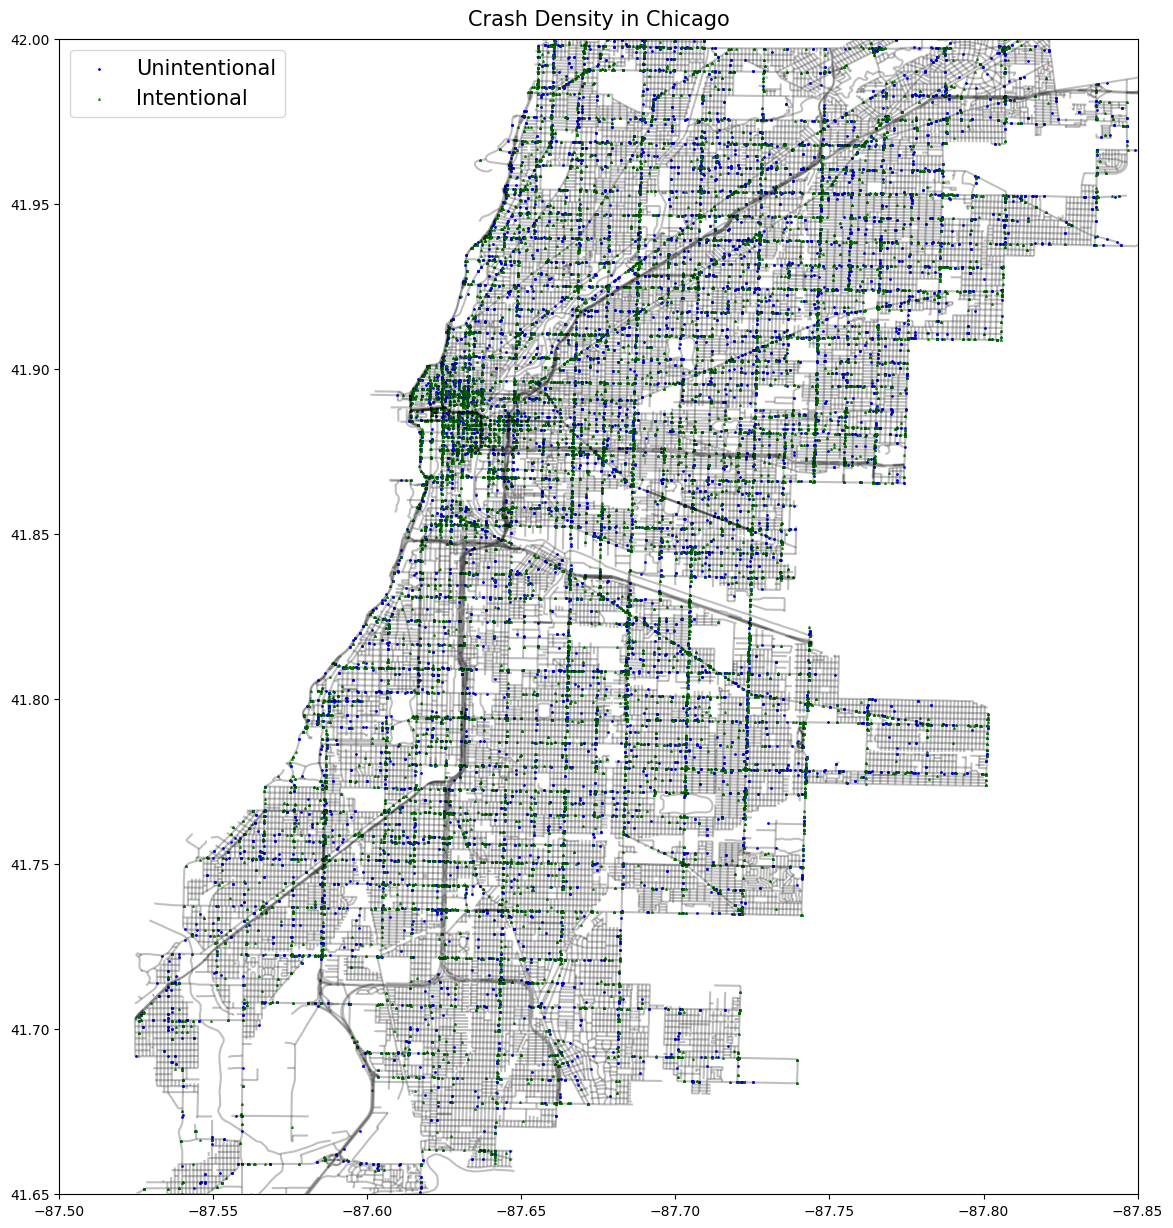

<Figure size 640x480 with 0 Axes>

In [67]:
# Plot the coordinates
fig, ax = plt.subplots(figsize=(15, 15))
street_map.plot(ax=ax, alpha=0.25, color='black')
geo_data[geo_data['PRIM_CONTRIBUTORY_CAUSE'] == 0].plot(ax=ax, markersize=1, color='blue', marker='o', label='Unintentional')
geo_data[geo_data['PRIM_CONTRIBUTORY_CAUSE'] == 1].plot(ax=ax, markersize=1, color='green', marker='^', label='Intentional')
plt.legend(prop={'size': 15})
plt.title('Crash Density in Chicago', fontsize=15, pad=10)

# Set the desired limits for the x-axis and y-axis
plt.xlim(-87.5, -87.85)  
plt.ylim(41.65, 42.0)  

# Display the plot
plt.show()
plt.savefig(r'images\street_map.png', bbox_inches='tight');

The map highlights a significant concentration of accidents in the downtown area of Chicago, indicating a higher density of incidents in that region. The predominant color in this area is green, indicating that a majority of the accidents are attributed to intentional actions or driver errors. However, it's important to note that there are also scattered blue plots throughout the map, suggesting a considerable number of accidents that occur unintentionally or present opportunities for improvement in terms of safety measures.

#### Question Two

*What are the contributing factors or characteristics associated with severe car accidents in Chicago city?*

Our focus will be on accidents that were categorized as 'Unintentional' in order to delve deeper into the underlying causes and identify potential areas for improvement. By narrowing our analysis to these specific incidents, we can gain valuable insights into the root causes of unintentional accidents and uncover opportunities for enhancing safety measures and preventing similar occurrences in the future.

In [68]:
# Selecting the relevant columns for analysis
factors = final_data[['DRIVER_VISION','POSTED_SPEED_LIMIT','TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION',
                    'WEATHER_CONDITION','LIGHTING_CONDITION',
                    'TRAFFICWAY_TYPE','ROADWAY_SURFACE_COND',
                    'ROAD_DEFECT','PRIM_CONTRIBUTORY_CAUSE']].copy()

In [69]:
# Filtering the data for control failures (Unintentional accidents)
control_failures = factors[factors.PRIM_CONTRIBUTORY_CAUSE == 0].copy()
# Removing the 'PRIM_CONTRIBUTORY_CAUSE' column as it is no longer needed
control_failures.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1, inplace=True)
# Displaying the column names of the control_failures DataFrame
control_failures.columns

Index(['DRIVER_VISION', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT'],
      dtype='object')

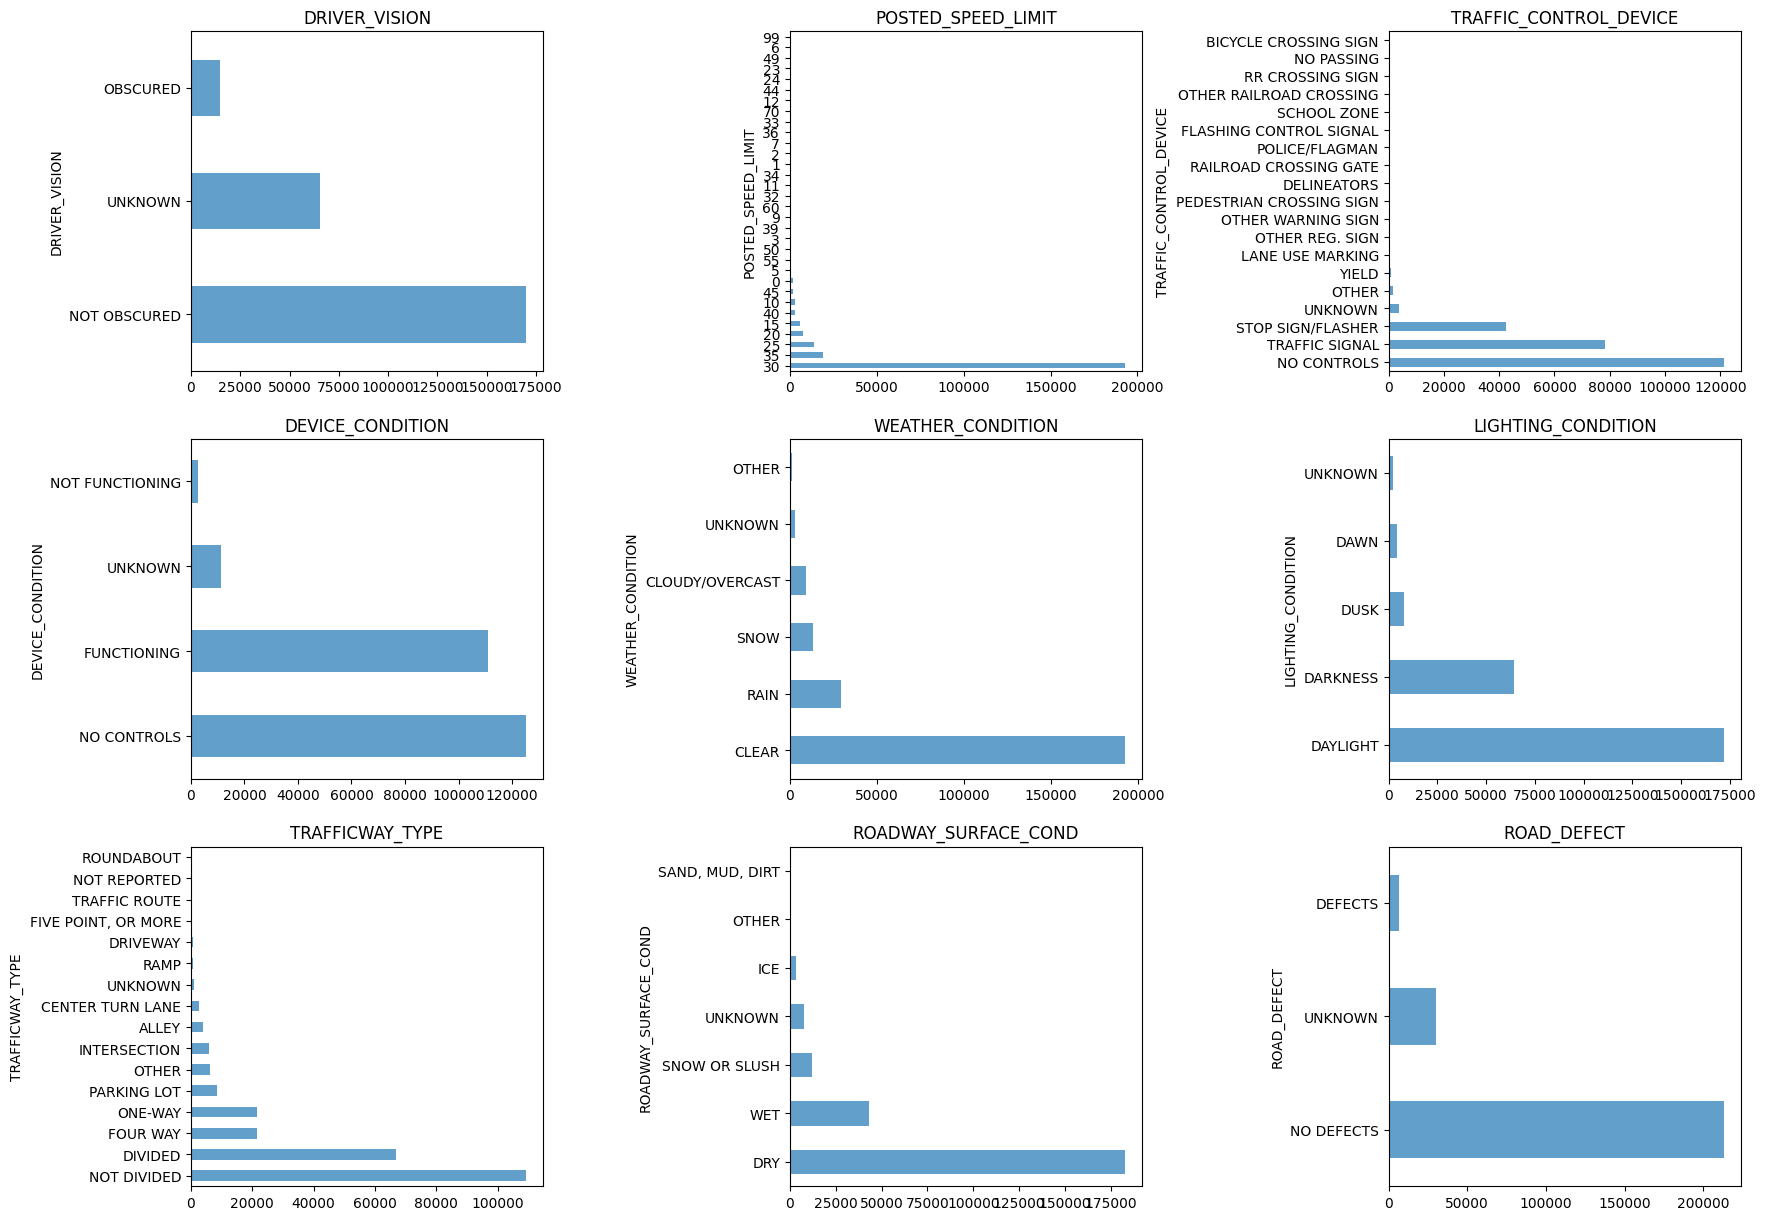

In [70]:
# Creating an empty dictionary to store column-wise value counts
#Calculating value counts for the current column and storing it in the dictionary
# Iterating over each column in the control_failures DataFrame
count_dict = {}
for col in control_failures.columns:
    count_dict[str(col)] = control_failures[col].value_counts()
#plotting the predictors
plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.7)

for index, value in enumerate(count_dict):
    ax = plt.subplot(3, 3, index+1)
    chart = pd.DataFrame(count_dict[value])
    chart.plot(ax=ax, kind='barh', legend=False, alpha=0.7)
    ax.set_title(value)
    plt.savefig(r'images\quiz_two.png', bbox_inches='tight');


From the above plot we can draw the following conclusions:

* Upon analyzing the contributing factors associated with control failures in unintentional accidents, it is evident that a majority of the accidents occurred when the driver's vision was not obscured. Furthermore, it is notable that these accidents occurred while the drivers were adhering to the posted speed limit, typically set at 30 mph. These findings suggest that factors other than vision or speed might be contributing to control failures in these accidents.

* An important finding from the analysis is that the absence of traffic control devices has been the primary contributing factor to the number of accidents in Chicago. This suggests that increasing the presence of traffic control devices throughout the city could potentially reduce the occurrence of unintentional accidents. This finding is further supported by the Device Condition plot, which indicates a higher count of accidents when there are no traffic control devices in place. Implementing and improving traffic control measures can therefore be an effective strategy to mitigate control failures and enhance road safety in Chicago.

* The analysis indicates that weather condition and lighting condition have relatively minimal impact on the occurrence of accidents. These factors do not show a strong correlation with the number of accidents in Chicago. 

* Significant number of accidents occur on roads categorized as "Not Divided" in terms of trafficway type. This suggests that implementing road division measures, such as adding medians or physical barriers, can potentially mitigate the occurrence of accidents. Dividing the roads can enhance traffic management, separate opposing flows of traffic, and reduce the likelihood of collisions, thereby contributing to improved road safety.

* The analysis indicates that the roadway surface condition and road defects have a relatively minimal impact on the occurrence of these accidents. It suggests that the condition of the road surface, such as potholes or uneven pavement, and the presence of road defects, such as cracks or debris, may not be significant contributors to the unintentional accidents in Chicago. 

#### Question Three

*Are there any seasonal or temporal patterns in car accidents in Chicago city?*

I will explores whether there are any recurring patterns in car accidents based on hour, months, days of the week, or specific time intervals I will use both the intenational and unintentional crash data.

In [71]:
# Selecting the columns 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', and 'CRASH_MONTH' from the 'final_data' DataFrame
# and creating a new DataFrame called 'crash_time'
crash_time= final_data[['CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']].copy()
crash_time

,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,23,3,5
1,23,3,5
2,23,3,5
3,23,3,5
4,23,3,5
...,...,...,...
577424,17,7,1
577425,19,4,6
577426,7,3,1
577427,7,3,1


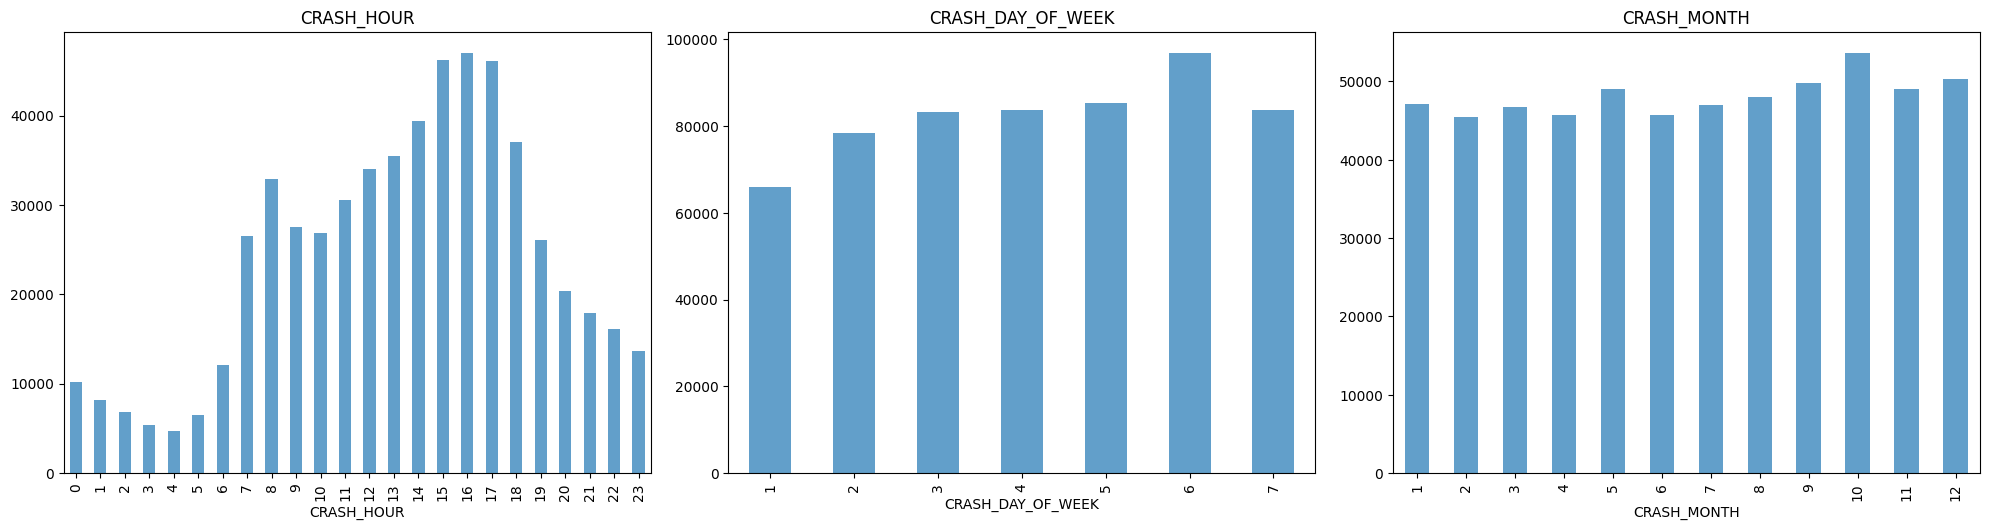

<Figure size 640x480 with 0 Axes>

In [72]:
# Plot the graphs
crash_time = final_data[['CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']].copy()

plt.figure(figsize=(20, 15))
plt.subplots_adjust(wspace=0.7)

for i, col in enumerate(crash_time.columns):
    ax = plt.subplot(3, 3, i+1)
    chart_2 = pd.DataFrame(crash_time[col].value_counts()).sort_index()
    chart_2.plot(ax=ax, kind='bar', legend=False, alpha=0.7)
    ax.set_title(col)

plt.tight_layout()
plt.show()
plt.savefig(r'images\quiz_three.png', bbox_inches='tight');

From the above plots we can come to conclusion:

* The analysis of the crash time data reveals that a significant number of accidents in Chicago occur between the hours of 14 to 18, which coincides with the peak rush hour traffic. This suggests that the high volume of vehicles during these hours contributes to the increased accident rate. Considering the concentration of accidents in the downtown area during this time frame, it becomes apparent that better traffic management strategies are needed.

To address this issue, it is recommended that the city implements additional measures to facilitate traffic flow and reduce congestion in the downtown area during these peak hours. This can include deploying more traffic management personnel or implementing intelligent transportation systems to optimize traffic signal timings and improve the coordination of traffic movements. By enhancing traffic management during rush hours, the city can mitigate the number of accidents and improve overall road safety in the downtown area.

* The analysis of the crash data by day of the week indicates that there is a slightly higher number of accidents during the weekends compared to other days. However, the difference in accident frequency between weekdays and weekends is not substantial. Therefore, it can be concluded that the crash hour plays a more significant role in determining accident occurrence than the specific day of the week.

* Analyzing the crash data by month reveals some interesting patterns. The number of car accidents in Chicago tends to be higher during the summer months, particularly in June, July, August and September. This can be attributed to various factors such as increased travel and tourism, more outdoor activities, and potentially more congested roads during the summer season.

However, it is important to note that while there may be higher accident rates during certain months, the difference in accident frequency between months is not significant enough to warrant major adjustments in road safety strategies based solely on the crash month.

#### Preparing data

In [73]:
#Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import  roc_curve
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
# Create X dataframe by dropping specific columns from final_data
X = final_data.drop(['PRIM_CONTRIBUTORY_CAUSE', 'CRASH_HOUR','CRASH_DAY_OF_WEEK', 
                   'CRASH_MONTH', 'LONGITUDE', 'LATITUDE', 'LOCATION'], axis=1).copy()
# Assign PRIM_CONTRIBUTORY_CAUSE column to y variable
y = final_data.PRIM_CONTRIBUTORY_CAUSE

In [75]:
# Convert predictors into dummies
X = pd.get_dummies(X, drop_first=True)

#### Train-Test Split
To evaluate the performance of our model we are splitting the dataset into two parts: a training set and a testing set.we then train a machine learning model on the training set using the 'fit' method

In [76]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [77]:
print(X_train.shape)  # print (n_train_samples, n_features)
print(X_test.shape)   # print (n_test_samples, n_features)
print(y_train.shape)  # print (n_train_samples,)
print(y_test.shape)   # print (n_test_samples,)

(404200, 210)
(173229, 210)
(404200,)
(173229,)


#### Scale the data by standard scaler

In [78]:
#Instantiate Standard Scaler
scaler = StandardScaler()

# Fit and transform train and test set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
# Create a DataFrame from the scaled training data and display the first few rows of the scaled training data DataFrame
scaled_data_train = pd.DataFrame(X_train_scaled , columns=X_train.columns)
scaled_data_train.head()

,POSTED_SPEED_LIMIT,SEX_M,AGE_10.0,AGE_100.0,AGE_101.0,AGE_102.0,AGE_103.0,AGE_104.0,AGE_107.0,AGE_108.0,...,TRAFFICWAY_TYPE_TRAFFIC ROUTE,TRAFFICWAY_TYPE_UNKNOWN,ROADWAY_SURFACE_COND_ICE,ROADWAY_SURFACE_COND_OTHER,"ROADWAY_SURFACE_COND_SAND, MUD, DIRT",ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN,ROADWAY_SURFACE_COND_WET,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_UNKNOWN
0,0.141445,0.819479,-0.006092,-0.003853,-0.002724,-0.001573,-0.003146,-0.001573,-0.001573,0.0,...,-0.037711,-0.068977,-0.094518,-0.047029,-0.017016,-0.197821,-0.200954,2.333701,0.409679,-0.377768
1,0.141445,0.819479,-0.006092,-0.003853,-0.002724,-0.001573,-0.003146,-0.001573,-0.001573,0.0,...,-0.037711,-0.068977,-0.094518,-0.047029,-0.017016,-0.197821,-0.200954,-0.428504,0.409679,-0.377768
2,0.141445,-1.220287,-0.006092,-0.003853,-0.002724,-0.001573,-0.003146,-0.001573,-0.001573,0.0,...,-0.037711,-0.068977,-0.094518,-0.047029,-0.017016,-0.197821,-0.200954,-0.428504,-2.440936,-0.377768
3,0.141445,0.819479,-0.006092,-0.003853,-0.002724,-0.001573,-0.003146,-0.001573,-0.001573,0.0,...,-0.037711,-0.068977,-0.094518,-0.047029,-0.017016,-0.197821,-0.200954,-0.428504,0.409679,-0.377768
4,-1.726058,0.819479,-0.006092,-0.003853,-0.002724,-0.001573,-0.003146,-0.001573,-0.001573,0.0,...,-0.037711,-0.068977,-0.094518,-0.047029,-0.017016,-0.197821,-0.200954,-0.428504,0.409679,-0.377768


#### Feature Importance Using Random Forest

In [80]:
# Instantiate and fit the model
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_scaled, y_train)  

RandomForestClassifier()

In [81]:
# Get the column names of the features in the training data
labels = list(X_train.columns)

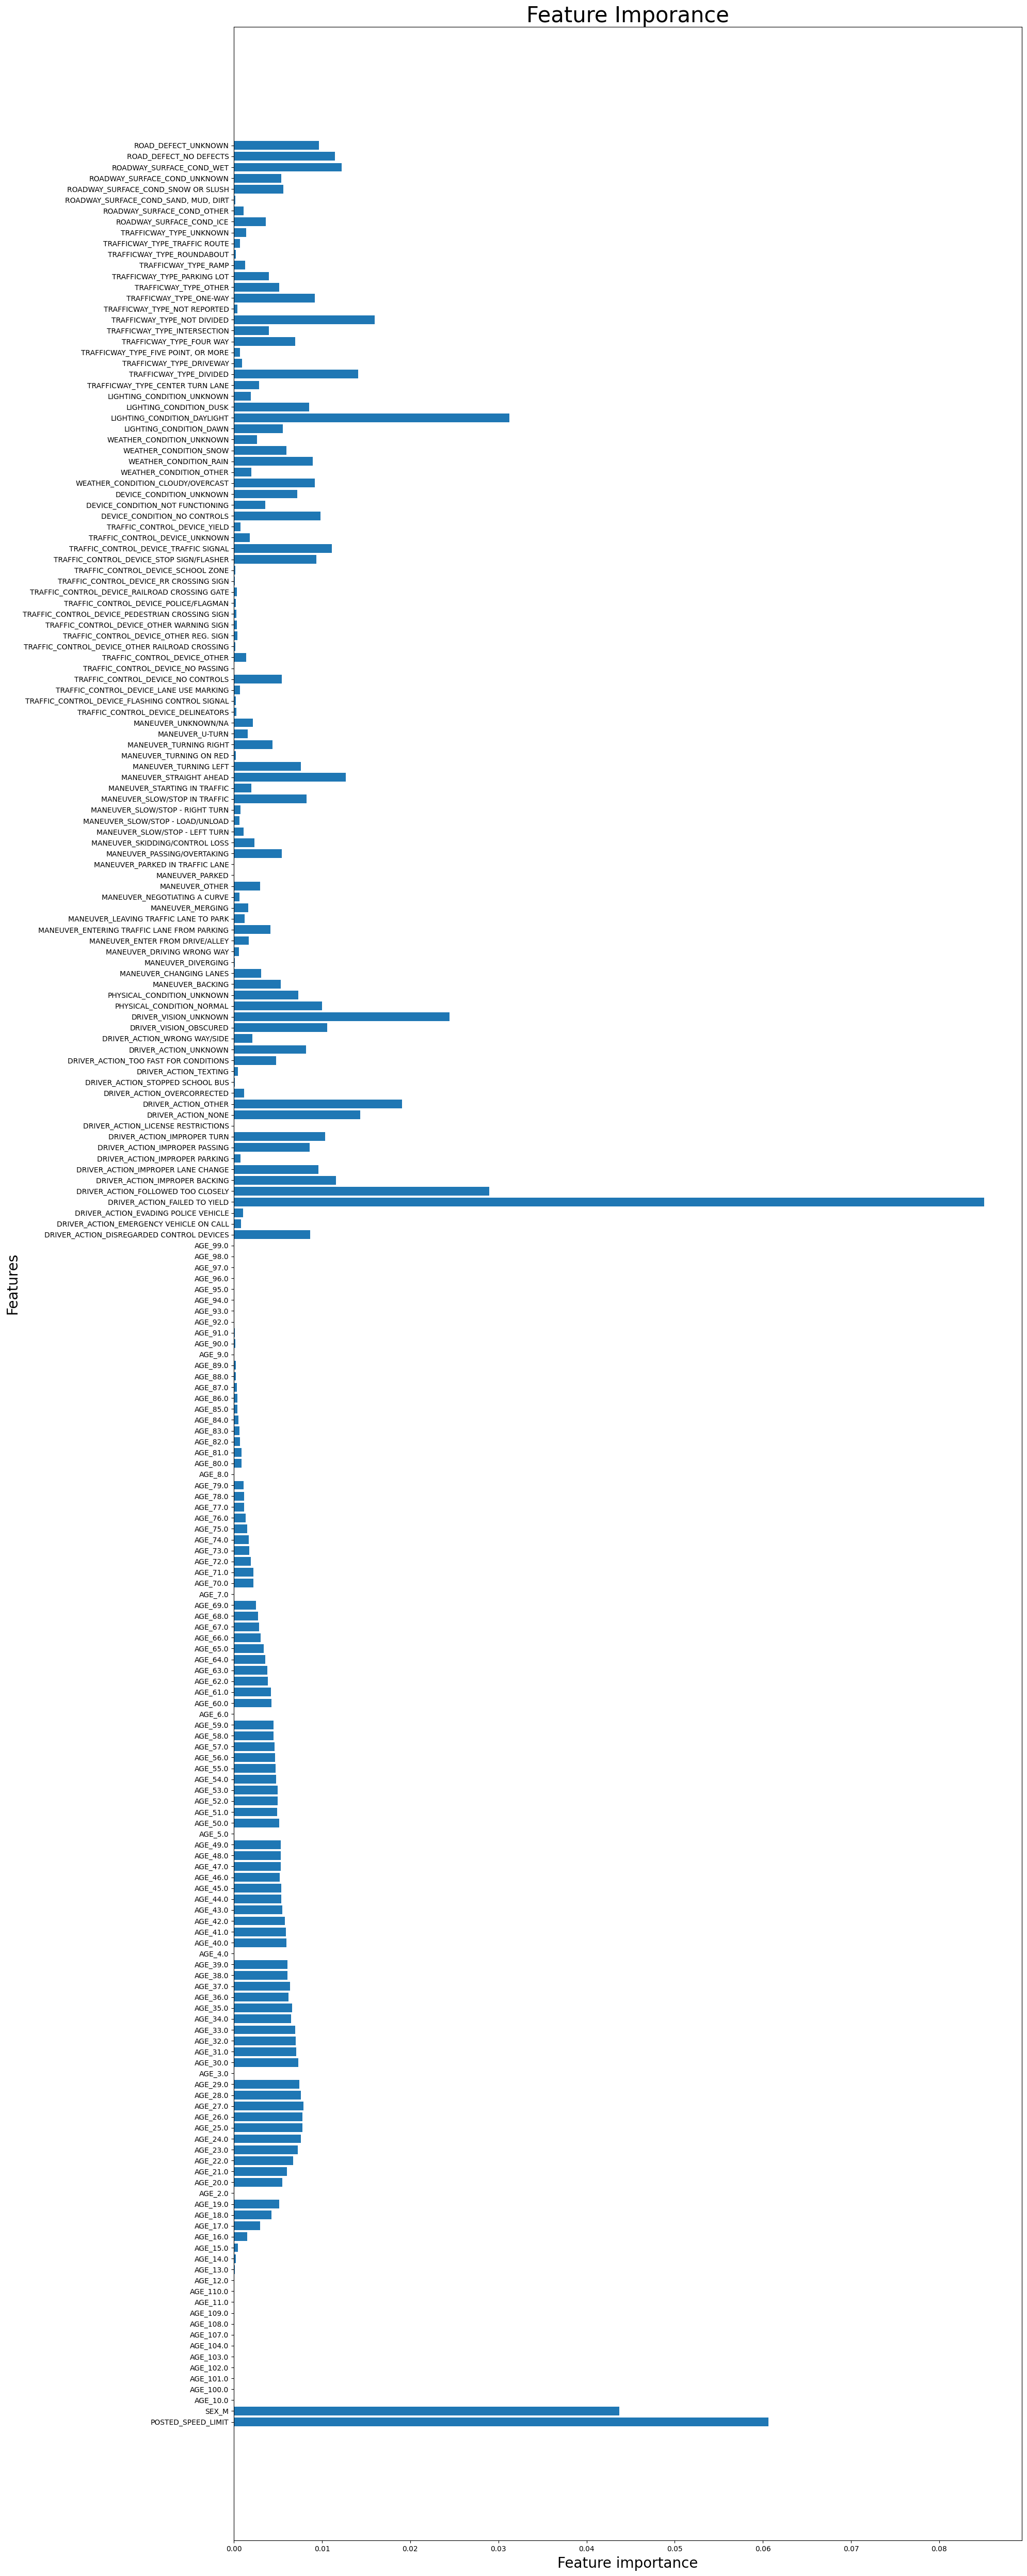

In [82]:
# Plot feature importances
n_features = X_train_scaled.shape[1]
plt.figure(figsize=(20,50))
plt.barh(range(n_features), rfc.feature_importances_, align='center') 
plt.yticks(np.arange(n_features),labels=labels)
plt.title('Feature Imporance', fontsize=30, pad=5)
plt.xlabel('Feature importance', fontsize=20, labelpad=5)
plt.ylabel('Features', fontsize=20)
plt.tight_layout()
plt.savefig(r'images\feature imp main.png', bbox_inches='tight')

We can use the feature importance mean to use as a cut-off point for imporantant vs non-important features.

In [83]:
#select features based on their importance scores using the mean value of feature importances
selected_features = X_train.columns[rfc.feature_importances_ > rfc.feature_importances_.mean()]
print(selected_features)

Index(['POSTED_SPEED_LIMIT', 'SEX_M', 'AGE_19.0', 'AGE_20.0', 'AGE_21.0',
       'AGE_22.0', 'AGE_23.0', 'AGE_24.0', 'AGE_25.0', 'AGE_26.0', 'AGE_27.0',
       'AGE_28.0', 'AGE_29.0', 'AGE_30.0', 'AGE_31.0', 'AGE_32.0', 'AGE_33.0',
       'AGE_34.0', 'AGE_35.0', 'AGE_36.0', 'AGE_37.0', 'AGE_38.0', 'AGE_39.0',
       'AGE_40.0', 'AGE_41.0', 'AGE_42.0', 'AGE_43.0', 'AGE_44.0', 'AGE_45.0',
       'AGE_46.0', 'AGE_47.0', 'AGE_48.0', 'AGE_49.0', 'AGE_50.0', 'AGE_51.0',
       'AGE_52.0', 'AGE_53.0', 'AGE_54.0',
       'DRIVER_ACTION_DISREGARDED CONTROL DEVICES',
       'DRIVER_ACTION_FAILED TO YIELD', 'DRIVER_ACTION_FOLLOWED TOO CLOSELY',
       'DRIVER_ACTION_IMPROPER BACKING', 'DRIVER_ACTION_IMPROPER LANE CHANGE',
       'DRIVER_ACTION_IMPROPER PASSING', 'DRIVER_ACTION_IMPROPER TURN',
       'DRIVER_ACTION_NONE', 'DRIVER_ACTION_OTHER',
       'DRIVER_ACTION_TOO FAST FOR CONDITIONS', 'DRIVER_ACTION_UNKNOWN',
       'DRIVER_VISION_OBSCURED', 'DRIVER_VISION_UNKNOWN',
       'PHYSICAL_CONDITI

In [84]:
# filter the feature importance scores based on their values, selecting only the scores that are above the mean
scores = rfc.feature_importances_
selected_features_scores = scores[rfc.feature_importances_ > rfc.feature_importances_.mean()]
labels_selected = list(selected_features)

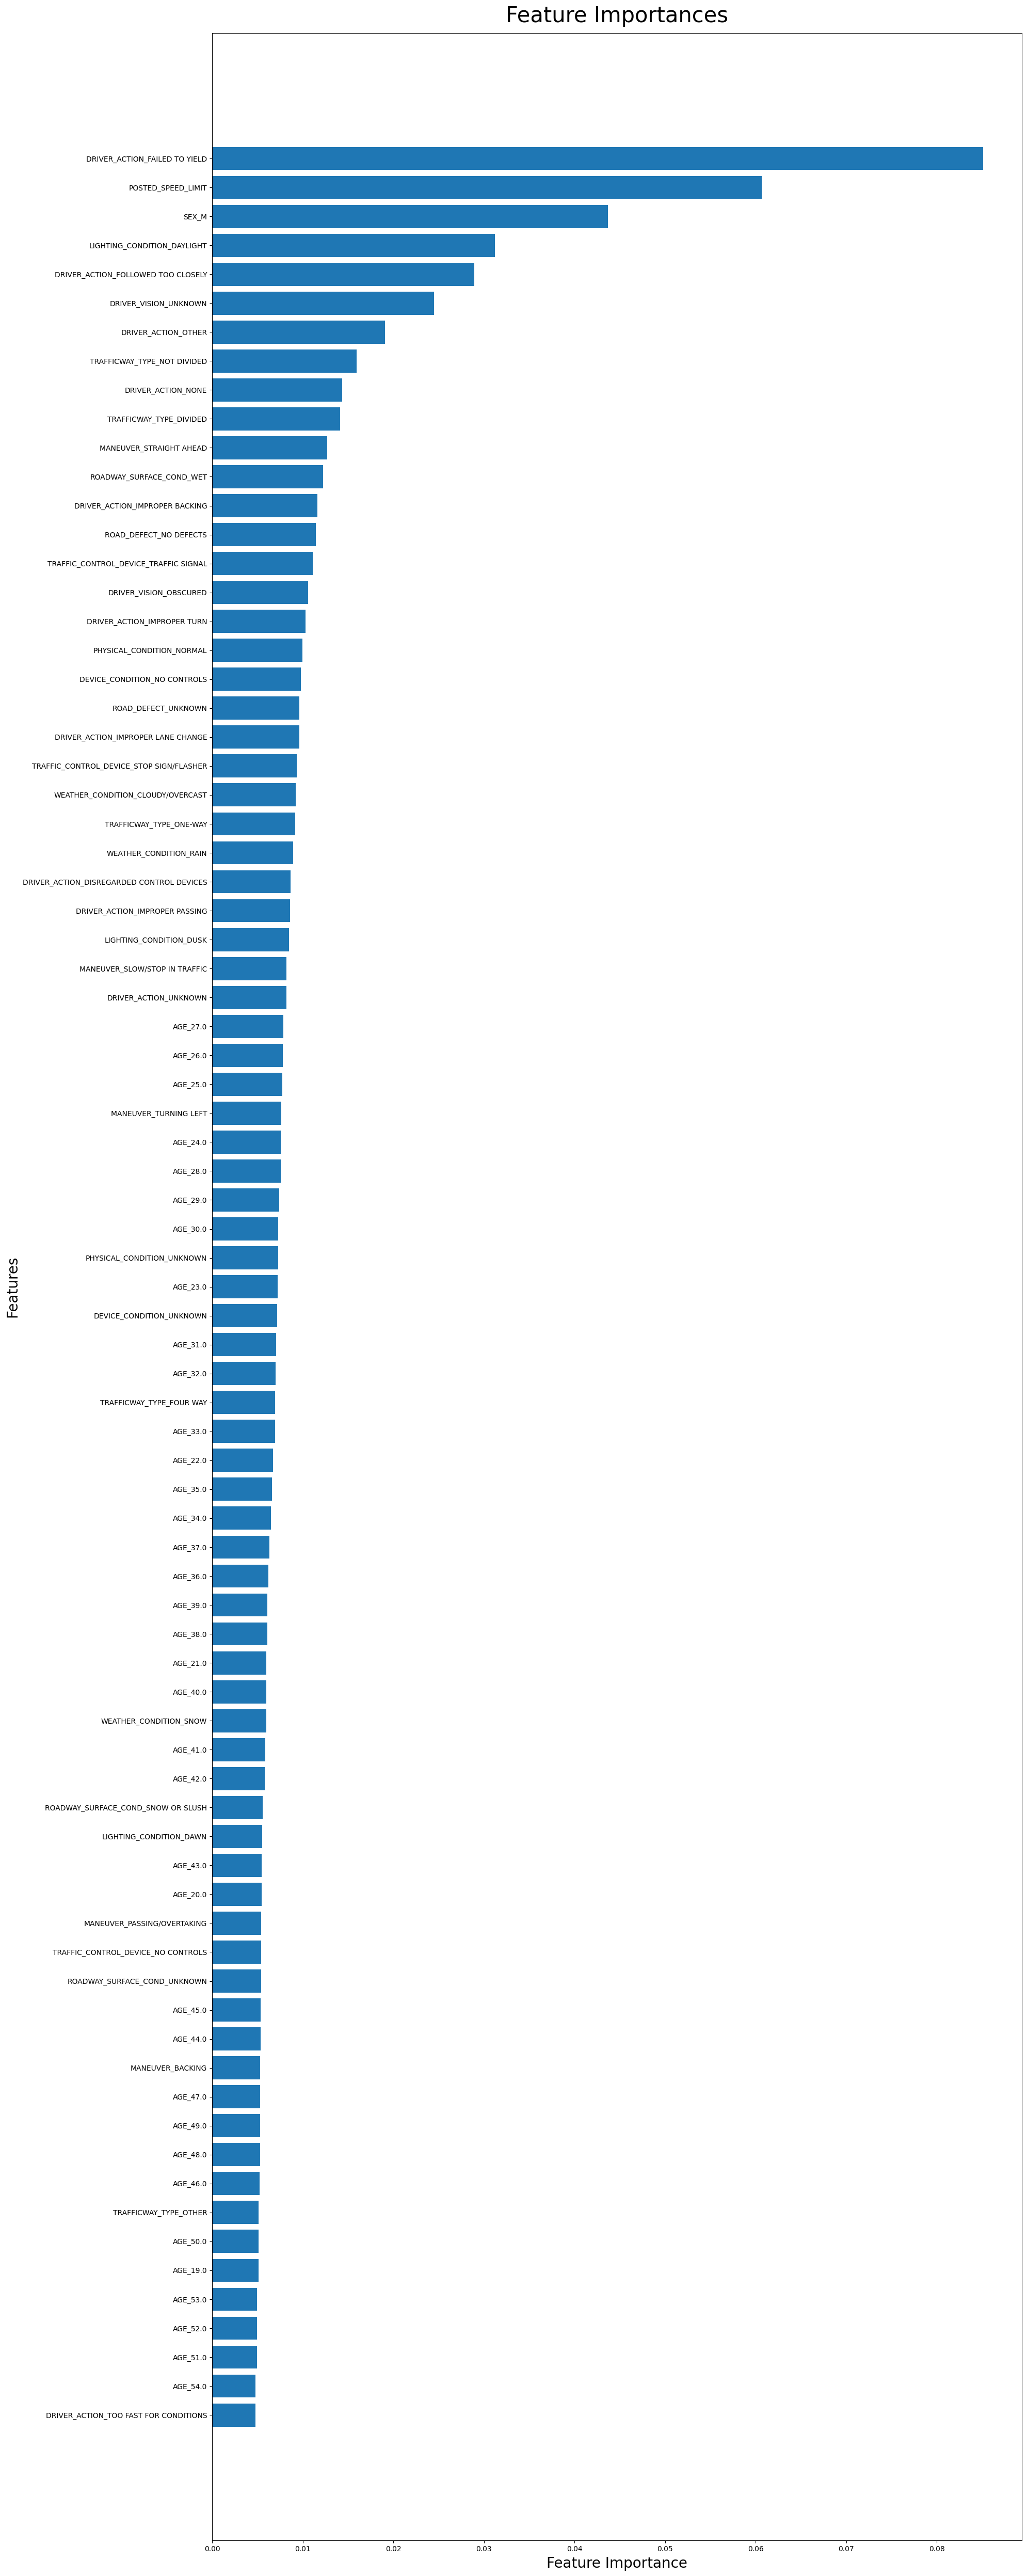

<Figure size 640x480 with 0 Axes>

In [85]:
# Plot feature importances
n_features = len(selected_features)

# Sort the selected features and their scores in ascending order
sorted_indices = np.argsort(selected_features_scores)
sorted_features = np.array(labels_selected)[sorted_indices]
sorted_scores = selected_features_scores[sorted_indices]

plt.figure(figsize=(20, 50))
plt.barh(range(n_features), sorted_scores, align='center')
plt.yticks(np.arange(n_features), labels=sorted_features)
plt.title('Feature Importances', fontsize=30, pad=15)
plt.xlabel('Feature Importance', fontsize=20, labelpad=5)
plt.ylabel('Features', fontsize=20)
plt.tight_layout()
plt.show()
plt.savefig(r'images\ feature imp sort.png', bbox_inches='tight');

By selecting features of importance that are higher than the mean, we can gain valuable insights into the primary causes of accidents. When comparing this list with the plot above, we can observe distinct characteristics related to the accidents. These selected features highlight the factors that contribute significantly to the occurrence of accidents and provide valuable information for understanding the underlying causes.
* The feature "DRIVER_ACTION_FAILED_TO_YIELD" stands out as the most important feature, followed by "POSTED_SPEED_LIMIT" and "SEX_M". These features play a crucial role in predicting the type of accidents associated with specific driver actions, whether they are classified as "INTENTIONAL" or "UNINTENTIONAL".

* The inclusion of features such as "TRAFFIC_CONTROL_DEVICE", "WEATHER_CONDITION", "TRAFFICWAY_TYPE", and "ROADWAY_SURFACE_COND" in the list of important features indicates that these characteristics are strong predictors of accidents. These features carry significant weight in determining the occurrence and severity of accidents.

* The data suggests that drivers are at a higher risk of accidents during their mid-20s, particularly at the age of 25. As drivers progress into older age groups, the likelihood of accidents gradually decreases. This pattern implies that drivers in their mid-20s may exhibit certain characteristics or behaviors that contribute to a higher accident risk compared to other age groups.





#### Creating a classifier

 I will create a classifier that can distinguish between "Unintentional" and "Intentional" accidents based on the available predictors in our dataset, we can use machine learning techniques. The classifier will be trained on the historical accident data, where each accident is labeled as either "Unintentional" or "Intentional" based on the contributing factors.

 #### Dimensionality Reduction
 Dimensionality Reduction: PCA helps in reducing the dimensionality of the dataset by transforming the original variables into a new set of uncorrelated variables called principal components. This is particularly useful when dealing with a high-dimensional dataset with a large number of predictors. By reducing the dimensionality, we can simplify the analysis and visualization of the data.
 

In [86]:
#Instantiate PCA with 95% exlained variance
pca = PCA(.95)
X_train_transformed = pca.fit_transform(X_train_scaled)
X_test_transformed = pca.transform(X_test_scaled)
X_train_transformed.shape

(404200, 182)

After applying Principal Component Analysis (PCA), the number of predictor columns in our dataset has been reduced from 210 to 182. PCA helps to identify and capture the most important information in the data by creating new variables called principal components. These principal components are linear combinations of the original predictor variables and are chosen in such a way that they explain the maximum amount of variation in the data. By using PCA, we have effectively reduced the dimensionality of the dataset while retaining a significant amount of the information present in the original predictors.

#### Decision Tree Classifier

Our initial model for classification will be a Decision Tree Classifier with a tree depth of 3. This means that the decision tree will have a maximum depth of 3 levels, allowing it to make decisions based on three predictor variables at each step. The decision tree algorithm uses a tree-like structure to classify the data based on the features or predictors. By limiting the tree depth to 3, we aim to strike a balance between model complexity and interpretability. This base model will serve as a starting point for further analysis and model improvement.

In [87]:
# Initializes a DecisionTreeClassifier 
tree_clf= DecisionTreeClassifier(criterion='gini', max_depth=3)

In [88]:
#Fit the model
tree_clf.fit(X_train_transformed, y_train)

DecisionTreeClassifier(max_depth=3)

In [89]:
# Create an array to make predictions for train and test data
y_pred_train = tree_clf.predict(X_train_transformed)
y_pred_test = tree_clf.predict(X_test_transformed)

In [90]:
# Calculate accuracy 
train_acc = accuracy_score(y_train,y_pred_train) * 100
test_acc = accuracy_score(y_test, y_pred_test) * 100
print('Train accuracy is :{0}'.format(train_acc))
print('Test accuracy is :{0}'.format(test_acc))

# Check the AUC for predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred_test, rownames=['True'], colnames=['Predicted'], margins=True)

Train accuracy is :65.21499257793172
Test accuracy is :65.22291302264632

AUC is :0.63

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,34751,40207,74958
1,20037,78234,98271
All,54788,118441,173229


The close similarity between the train and test accuracy values indicates that the model is performing well and is likely to generalize well to unseen data.The model is not overfitting or underfitting the training data, as it achieves similar performance on both the training and testing datasets.

In [91]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

def evaluate_classification(model, X_train_transformed, X_test_transformed, y_train, y_test, classes=None, normalize='true', cmap='Blues_r', label='', save_dir='plots'):

    # Create save directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)

    # retrieve predictions for train and test data
    y_pred_train = model.predict(X_train_transformed)
    y_pred_test = model.predict(X_test_transformed)

    # print training classification report
    header = label + " CLASSIFICATION REPORT TRAINING "
    dashes = "---" * 20
    print(dashes, header, dashes, sep='\n')
    print(classification_report(y_train, y_pred_train, target_names=classes))

    # calculate confusion matrix for training data
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_train_norm = cm_train / cm_train.sum(axis=1)[:, np.newaxis] if normalize == 'true' else cm_train

    # print testing classification report
    header_ = label + " CLASSIFICATION REPORT TESTING "
    print(dashes, header_, dashes, sep='\n')
    print(classification_report(y_test, y_pred_test, target_names=classes))

    # calculate confusion matrix for testing data
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_test_norm = cm_test / cm_test.sum(axis=1)[:, np.newaxis] if normalize == 'true' else cm_test

    # Create a combined figure for training and testing plots
    fig, axes = plt.subplots(figsize=(12, 4), ncols=4)

    # plot confusion matrix for training data
    sns.heatmap(cm_train_norm, annot=True, fmt='.2f', cmap=cmap, ax=axes[0])
    axes[0].set(title='Confusion Matrix Training', xlabel='Predicted Labels', ylabel='True Labels')

    # plot ROC curve for training data
    fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train_transformed)[:, 1])
    roc_auc_train = roc_auc_score(y_train, model.predict_proba(X_train_transformed)[:, 1])
    axes[1].plot(fpr_train, tpr_train, label=f'AUC = {roc_auc_train:.2f}')
    axes[1].plot([0, 1], [0, 1], ls=':')
    axes[1].set(xlabel='False Positive Rate', ylabel='True Positive Rate',
                title='Receiver Operating Characteristic Training')
    axes[1].legend(loc='lower right')

    # plot confusion matrix for testing data
    sns.heatmap(cm_test_norm, annot=True, fmt='.2f', cmap=cmap, ax=axes[2])
    axes[2].set(title='Confusion Matrix Testing', xlabel='Predicted Labels', ylabel='True Labels')

    # plot ROC curve for testing data
    fpr_test, tpr_test, _ = roc_curve(y_test, model.predict_proba(X_test_transformed)[:, 1])
    roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test_transformed)[:, 1])
    axes[3].plot(fpr_test, tpr_test, label=f'AUC = {roc_auc_test:.2f}')
    axes[3].plot([0, 1], [0, 1], ls=':')
    axes[3].set(xlabel='False Positive Rate', ylabel='True Positive Rate',
                title='Receiver Operating Characteristic Testing')
    axes[3].legend(loc='lower right')

    # Adjust spacing between subplots
    plt.tight_layout(pad=2.0)

    # Save combined plots
    plt.savefig(os.path.join(save_dir, 'combined_plots.png'))

    plt.show()


------------------------------------------------------------
Decision Tree CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.46      0.54    175263
           1       0.66      0.80      0.72    228937

    accuracy                           0.65    404200
   macro avg       0.65      0.63      0.63    404200
weighted avg       0.65      0.65      0.64    404200

------------------------------------------------------------
Decision Tree CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.46      0.54     74958
           1       0.66      0.80      0.72     98271

    accuracy                           0.65    173229
   macro avg       0.65      0.63      0.63    173229
weighted avg       0.65      0.65      0.64    173229



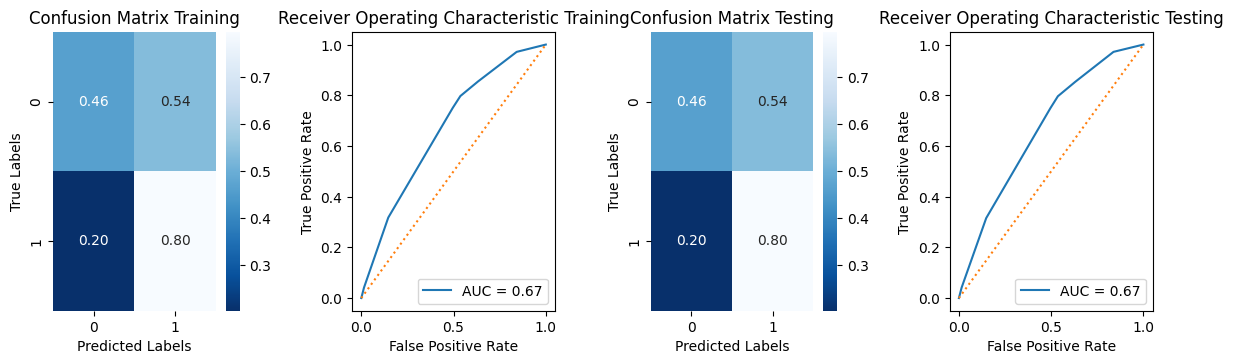

In [92]:
# Call the evaluate_classification function with the desired parameters
evaluate_classification(tree_clf, X_train_transformed, X_test_transformed, y_train, y_test, label='Decision Tree', save_dir='images')

Based on the ROC curve, the model's performance in predicting the classes is moderate. The AUC value of 0.67 indicates that there is a 67% chance that the model will correctly classify each target variable. This means that the model has some predictive power, but it is not highly accurate. There is still room for improvement in achieving more accurate predictions.

#### Re-grow the tree using entropy



In [93]:
#Instantiate the model
dtc_entropy = DecisionTreeClassifier(criterion='entropy')

#Fit the model
dtc_entropy.fit(X_train_transformed, y_train)

# Make predictions for train and test data
y_pred_train_dtc1 = dtc_entropy.predict(X_train_transformed)
y_pred_test_dtc1 = dtc_entropy.predict(X_test_transformed)

# Calculate accuracy 
train_acc1 = accuracy_score(y_train,y_pred_train_dtc1) * 100
test_acc1 = accuracy_score(y_test, y_pred_test_dtc1) * 100
print('Train accuracy is :{0}'.format(train_acc1))
print('Test accuracy is :{0}'.format(test_acc1))

# Check the AUC for predictions
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_test)
roc_auc1 = auc(fpr1, tpr1)
print('\nAUC is :{0}'.format(round(roc_auc1, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred_test, rownames=['True'], colnames=['Predicted'], margins=True)

Despite using the entropy criterion for re-growing the decision tree, it did not significantly improve the model's performance. Although the model achieved high accuracy on the training data, it failed to generalize well to the test set.This suggests that the model has become overfitted.

#### K-Nearest Neighbor

In [ ]:
# Instantiate and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train_transformed, y_train)


In [ ]:
# predict
# y_pred = knn.predict(X_test_transformed)

In [ ]:
# Call the evaluate_classification function with the Knn classifier
evaluate_classification(Knn, X_train_transformed, X_test_transformed, y_train, y_test, label='Knn', save_dir='images')


The KNN classifier performs slightly better than our base model, achieving an accuracy of 65% and an AUC score of 0.63. Although there is an improvement compared to the base model, the performance is still relatively modest.

#### Random Forest

In [ ]:
# Instantiate and fit the model
rf = RandomForestClassifier(n_estimators=100, max_depth= 5)
rf.fit(X_train_transformed, y_train)  

In [ ]:
# Call the pred_score function with Random forest classifier
pred_score(rf)

Upon examining the train and test accuracy of the random forest model, we can observe that it fits the data well. The AUC score of 0.62 indicates that there is a 62% probability that the model will correctly classify the target variable. Additionally, the disparity in f1-scores between the two classifiers suggests that there is some inherent bias in the dataset that affects their performance differently.

#### Feature Importance with Random Forest

In [ ]:
# Plot feature importances
n_features = X_train_transformed.shape[1]
plt.figure(figsize=(20,50))
plt.barh(range(n_features), rf.feature_importances_, align='center') 
plt.yticks(np.arange(n_features))
plt.title('Feature Imporance', fontsize=30, pad=5)
plt.xlabel('Feature importance', fontsize=20, labelpad=5)
plt.ylabel('Features', fontsize=20)
plt.tight_layout()

#### Selecting best features

In [ ]:
# Print the gini importance of each feature
for feature in zip(range(n_features), rf.feature_importances_):
    print(feature)